# Introduction

This tutorial is designed for performing the calculations in the tutorial, without any explantory text. For more information and explanations see https://sissopp_developers.gitlab.io/sissopp/tutorial/tutorial.html

Throughout this notebook we will also reduce the computational load of the calculations because otherwise the calculations are too expensive to run in a notebook in a reasonable time period.

In [5]:
import os

data_csv_lines = """# Material,E_RS - E_ZB (eV),Z_A (nuc_charge) ,Z_B (nuc_charge) ,period_A,period_B,IP_A (eV_IP) ,IP_B (eV_IP) ,EA_A (eV_IP),EA_B (eV_IP) ,E_HOMO_A (eV) ,E_HOMO_B (eV) ,E_LUMO_A (eV),E_LUMO_B (eV) , r_s_A (AA) , r_s_B (AA) , r_p_A (AA) , r_p_B (AA) , r_d_A (AA) , r_d_B (AA), r_sigma (AA) , r_pi (AA)
AgBr,-0.030033416711376,47,35,5,4,-8.0580997467,-12.649600029,-1.66659998894,-3.73930001259,-4.71000003815,-8.00100040436,-0.479000002146,0.708000004292,1.32000005245,0.75,1.87999999523,0.879999995232,2.97000002861,1.87000000477,1.570000052448,0.689999938012
AgCl,-0.042797278205399,47,17,5,3,-8.0580997467,-13.9018001556,-1.66659998894,-3.97079992294,-4.71000003815,-8.69999980927,-0.479000002146,0.574000000954,1.32000005245,0.680000007153,1.87999999523,0.759999990463,2.97000002861,1.66999995708,1.760000050064,0.63999992609
AgF,-0.153757673178916,47,9,5,2,-8.0580997467,-19.4043006897,-1.66659998894,-4.27349996567,-4.71000003815,-11.2939996719,-0.479000002146,1.25100004673,1.32000005245,0.409999996424,1.87999999523,0.370000004768,2.97000002861,1.42999994755,2.420000046488,0.599999934436
AgI,0.036925419641193,47,53,5,5,-8.0580997467,-11.2571001053,-1.66659998894,-3.5134999752,-4.71000003815,-7.23600006104,-0.479000002146,0.212999999523,1.32000005245,0.899999976158,1.87999999523,1.07000005245,2.97000002861,1.72000002861,1.230000019072,0.730000019072
AlAs,0.213261849108676,13,33,3,4,-5.78049993515,-9.26189994812,-0.3125,-1.83920001984,-2.78399991989,-5.34100008011,0.694999992847,0.0640000030398,1.09000003338,0.850000023842,1.38999998569,1.03999996185,1.94000005722,2.01999998093,0.590000033378,0.489999890318
AlN,0.072949073169639,13,7,3,2,-5.78049993515,-13.5852003098,-0.3125,-1.86749994755,-2.78399991989,-7.2389998436,0.694999992847,3.0569999218,1.09000003338,0.540000021458,1.38999998569,0.509999990463,1.94000005722,1.53999996185,1.430000007149,0.329999983305
AlP,0.218958341475627,13,15,3,3,-5.78049993515,-9.75059986115,-0.3125,-1.91999995708,-2.78399991989,-5.59600019455,0.694999992847,0.182999998331,1.09000003338,0.829999983311,1.38999998569,0.97000002861,1.94000005722,1.76999998093,0.680000007149,0.439999997609
AlSb,0.156868733960437,13,51,3,5,-5.78049993515,-8.46829986572,-0.3125,-1.84669995308,-2.78399991989,-4.99100017548,0.694999992847,0.104999996722,1.09000003338,1,1.38999998569,1.23000001907,1.94000005722,2.05999994278,0.25,0.52999997138
AsGa,0.274277772419737,31,33,4,4,-5.81820011139,-9.26189994812,-0.108099997044,-1.83920001984,-2.73200011253,-5.34100008011,0.129999995232,0.0640000030398,0.990000009537,0.850000023842,1.33000004292,1.03999996185,2.16000008583,2.01999998093,0.430000066765,0.529999971391
AsB,0.874978183765052,5,33,2,4,-8.18999958038,-9.26189994812,-0.107400000095,-1.83920001984,-3.71499991417,-5.34100008011,2.24799990654,0.0640000030398,0.810000002384,0.850000023842,0.829999983311,1.03999996185,1.95000004768,2.01999998093,0.249999999997,0.209999918935
BN,1.71208026083627,5,7,2,2,-8.18999958038,-13.5852003098,-0.107400000095,-1.86749994755,-3.71499991417,-7.2389998436,2.24799990654,3.0569999218,0.810000002384,0.540000021458,0.829999983311,0.509999990463,1.95000004768,1.53999996185,0.589999973774,0.050000011922
BP,1.01922516119521,5,15,2,3,-8.18999958038,-9.75059986115,-0.107400000095,-1.91999995708,-3.71499991417,-5.59600019455,2.24799990654,0.182999998331,0.810000002384,0.829999983311,0.829999983311,0.97000002861,1.95000004768,1.76999998093,0.160000026226,0.160000026226
BSb,0.580849114368903,5,51,2,5,-8.18999958038,-8.46829986572,-0.107400000095,-1.84669995308,-3.71499991417,-4.99100017548,2.24799990654,0.104999996722,0.810000002384,1,0.829999983311,1.23000001907,1.95000004768,2.05999994278,0.590000033375,0.249999999997
BaO,-0.092998553867801,56,8,6,2,-5.51569986343,-16.4332008362,0.277999997139,-3.00589990616,-3.34599995613,-9.19699954987,-2.1289999485,2.54099988937,2.15000009537,0.460000008345,2.63000011444,0.430000007153,1.35000002384,2.22000002861,3.890000194312,0.510000020262
BaS,-0.319762429426191,56,16,6,3,-5.51569986343,-11.7951002121,0.277999997139,-2.84489989281,-3.34599995613,-7.10599994659,-2.1289999485,0.64200001955,2.15000009537,0.740000009537,2.63000011444,0.850000023842,1.35000002384,2.36999988556,3.190000176431,0.590000033375
BaSe,-0.343445134087233,56,34,6,4,-5.51569986343,-10.9460000992,0.277999997139,-2.75099992752,-3.34599995613,-6.65399980545,-2.1289999485,1.31599998474,2.15000009537,0.800000011921,2.63000011444,0.949999988079,1.35000002384,2.18000006676,3.03000020981,0.629999995228
BaTe,-0.375386809668271,56,52,6,5,-5.51569986343,-9.86670017242,0.277999997139,-2.66599988937,-3.34599995613,-6.10900020599,-2.1289999485,0.0989999994636,2.15000009537,0.939999997616,2.63000011444,1.13999998569,1.35000002384,1.83000004292,2.700000226504,0.680000007144
BeO,0.691837577232946,4,8,2,2,-9.459400177,-16.4332008362,0.630500018597,-3.00589990616,-5.59999990463,-9.19699954987,-2.09800004959,2.54099988937,1.08000004292,0.460000008345,1.21000003815,0.430000007153,2.88000011444,2.22000002861,1.400000065572,0.159999996422
BeS,0.506327674543172,4,16,2,3,-9.459400177,-11.7951002121,0.630500018597,-2.84489989281,-5.59999990463,-7.10599994659,-2.09800004959,0.64200001955,1.08000004292,0.740000009537,1.21000003815,0.850000023842,2.88000011444,2.36999988556,0.700000047691,0.240000009535
BeSe,0.49494044277526,4,34,2,4,-9.459400177,-10.9460000992,0.630500018597,-2.75099992752,-5.59999990463,-6.65399980545,-2.09800004959,1.31599998474,1.08000004292,0.800000011921,1.21000003815,0.949999988079,2.88000011444,2.18000006676,0.54000008107,0.279999971388
BeTe,0.468585910493857,4,52,2,5,-9.459400177,-9.86670017242,0.630500018597,-2.66599988937,-5.59999990463,-6.10900020599,-2.09800004959,0.0989999994636,1.08000004292,0.939999997616,1.21000003815,1.13999998569,2.88000011444,1.83000004292,0.210000097764,0.329999983304
C2,2.62860363913364,6,6,2,2,-10.8516998291,-10.8516998291,-0.87239998579,-0.87239998579,-5.41599988937,-5.41599988937,1.99199998379,1.99199998379,0.639999985695,0.639999985695,0.629999995232,0.629999995232,1.62999999523,1.62999999523,0,0.019999980926
CaO,-0.265219041319142,20,8,4,2,-6.4279999733,-16.4332008362,0.303900003433,-3.00589990616,-3.86400008202,-9.19699954987,-2.132999897,2.54099988937,1.75999999046,0.460000008345,2.31999993324,0.430000007153,0.680000007153,2.22000002861,3.189999908202,0.589999943972
CaS,-0.369133194537426,20,16,4,3,-6.4279999733,-11.7951002121,0.303900003433,-2.84489989281,-3.86400008202,-7.10599994659,-2.132999897,0.64200001955,1.75999999046,0.740000009537,2.31999993324,0.850000023842,0.680000007153,2.36999988556,2.489999890321,0.669999957085
CaSe,-0.360797734421794,20,34,4,4,-6.4279999733,-10.9460000992,0.303900003433,-2.75099992752,-3.86400008202,-6.65399980545,-2.132999897,1.31599998474,1.75999999046,0.800000011921,2.31999993324,0.949999988079,0.680000007153,2.18000006676,2.3299999237,0.709999918938
CaTe,-0.350456279076752,20,52,4,5,-6.4279999733,-9.86670017242,0.303900003433,-2.66599988937,-3.86400008202,-6.10900020599,-2.132999897,0.0989999994636,1.75999999046,0.939999997616,2.31999993324,1.13999998569,0.680000007153,1.83000004292,1.999999940394,0.759999930854
CdO,-0.084161358026904,48,8,5,2,-9.5813999176,-16.4332008362,0.838699996471,-3.00589990616,-5.95200014114,-9.19699954987,-1.30900001526,2.54099988937,1.23000001907,0.460000008345,1.74000000954,0.430000007153,2.59999990463,2.22000002861,2.080000013112,0.539999991662
CdS,0.072672795911785,48,16,5,3,-9.5813999176,-11.7951002121,0.838699996471,-2.84489989281,-5.95200014114,-7.10599994659,-1.30900001526,0.64200001955,1.23000001907,0.740000009537,1.74000000954,0.850000023842,2.59999990463,2.36999988556,1.379999995231,0.620000004775
CdSe,0.083571949086036,48,34,5,4,-9.5813999176,-10.9460000992,0.838699996471,-2.75099992752,-5.95200014114,-6.65399980545,-1.30900001526,1.31599998474,1.23000001907,0.800000011921,1.74000000954,0.949999988079,2.59999990463,2.18000006676,1.22000002861,0.659999966628
CdTe,0.114539532194613,48,52,5,5,-9.5813999176,-9.86670017242,0.838699996471,-2.66599988937,-5.95200014114,-6.10900020599,-1.30900001526,0.0989999994636,1.23000001907,0.939999997616,1.74000000954,1.13999998569,2.59999990463,1.83000004292,0.890000045304,0.709999978544
BrCs,-0.155867302994011,55,35,6,4,-4.00619983673,-12.649600029,-0.569599986076,-3.73930001259,-2.22000002861,-8.00100040436,-0.547999978065,0.708000004292,2.46000003815,0.75,3.16000008583,0.879999995232,1.97000002861,1.87000000477,3.990000128748,0.830000042912
ClCs,-0.15034615744662,55,17,6,3,-4.00619983673,-13.9018001556,-0.569599986076,-3.97079992294,-2.22000002861,-8.69999980927,-0.547999978065,0.574000000954,2.46000003815,0.680000007153,3.16000008583,0.759999990463,1.97000002861,1.66999995708,4.180000126364,0.78000003099
CsF,-0.10826331867429,55,9,6,2,-4.00619983673,-19.4043006897,-0.569599986076,-4.27349996567,-2.22000002861,-11.2939996719,-0.547999978065,1.25100004673,2.46000003815,0.409999996424,3.16000008583,0.370000004768,1.97000002861,1.42999994755,4.840000122788,0.740000039336
CsI,-0.162387474498246,55,53,6,5,-4.00619983673,-11.2571001053,-0.569599986076,-3.5134999752,-2.22000002861,-7.23600006104,-0.547999978065,0.212999999523,2.46000003815,0.899999976158,3.16000008583,1.07000005245,1.97000002861,1.72000002861,3.650000095372,0.870000123972
BrCu,0.152442639788205,29,35,4,4,-8.38879966736,-12.649600029,-1.6384999752,-3.73930001259,-4.85599994659,-8.00100040436,-0.64099997282,0.708000004292,1.20000004768,0.75,1.67999994755,0.879999995232,2.57999992371,1.87000000477,1.249999999998,0.609999895102
ClCu,0.156258713192074,29,17,4,3,-8.38879966736,-13.9018001556,-1.6384999752,-3.97079992294,-4.85599994659,-8.69999980927,-0.64099997282,0.574000000954,1.20000004768,0.680000007153,1.67999994755,0.759999990463,2.57999992371,1.66999995708,1.439999997614,0.55999988318
CuF,-0.017022272342729,29,9,4,2,-8.38879966736,-19.4043006897,-1.6384999752,-4.27349996567,-4.85599994659,-11.2939996719,-0.64099997282,1.25100004673,1.20000004768,0.409999996424,1.67999994755,0.370000004768,2.57999992371,1.42999994755,2.099999994038,0.519999891526
CuI,0.204674583263113,29,53,4,5,-8.38879966736,-11.2571001053,-1.6384999752,-3.5134999752,-4.85599994659,-7.23600006104,-0.64099997282,0.212999999523,1.20000004768,0.899999976158,1.67999994755,1.07000005245,2.57999992371,1.72000002861,0.909999966622,0.649999976162
GaN,0.433445239093999,31,7,4,2,-5.81820011139,-13.5852003098,-0.108099997044,-1.86749994755,-2.73200011253,-7.2389998436,0.129999995232,3.0569999218,0.990000009537,0.540000021458,1.33000004292,0.509999990463,2.16000008583,1.53999996185,1.270000040536,0.370000064378
GaP,0.348751797751902,31,15,4,3,-5.81820011139,-9.75059986115,-0.108099997044,-1.91999995708,-2.73200011253,-5.59600019455,0.129999995232,0.182999998331,0.990000009537,0.829999983311,1.33000004292,0.97000002861,2.16000008583,1.76999998093,0.520000040536,0.480000078682
GaSb,0.154625285096699,31,51,4,5,-5.81820011139,-8.46829986572,-0.108099997044,-1.84669995308,-2.73200011253,-4.99100017548,0.129999995232,0.104999996722,0.990000009537,1,1.33000004292,1.23000001907,2.16000008583,2.05999994278,0.090000033387,0.570000052453
Ge2,0.200852526060771,32,32,4,4,-7.56699991226,-7.56699991226,-0.949000000954,-0.949000000954,-4.04600000381,-4.04600000381,2.17499995232,2.17499995232,0.920000016689,0.920000016689,1.15999996662,1.15999996662,2.36999988556,2.36999988556,0.0,0.479999899862
CGe,0.811442880200048,32,6,4,2,-7.56699991226,-10.8516998291,-0.949000000954,-0.87239998579,-4.04600000381,-5.41599988937,2.17499995232,1.99199998379,0.920000016689,0.639999985695,1.15999996662,0.629999995232,2.36999988556,1.62999999523,0.810000002382,0.249999940394
GeSi,0.263210170178354,32,14,4,3,-7.56699991226,-7.75769996643,-0.949000000954,-0.992999970913,-4.04600000381,-4.16300010681,2.17499995232,0.439999997616,0.920000016689,0.939999997616,1.15999996662,1.12999999523,2.36999988556,1.88999998569,0.009999990463,0.429999947545
AsIn,0.134047575193108,49,33,5,4,-5.53739976883,-9.26189994812,-0.256300002337,-1.83920001984,-2.6970000267,-5.34100008011,0.368000000715,0.0640000030398,1.12999999523,0.850000023842,1.5,1.03999996185,3.1099998951,2.01999998093,0.740000009538,0.559999942778
InN,0.15372029269929,49,7,5,2,-5.53739976883,-13.5852003098,-0.256300002337,-1.86749994755,-2.6970000267,-7.2389998436,0.368000000715,3.0569999218,1.12999999523,0.540000021458,1.5,0.509999990463,3.1099998951,1.53999996185,1.579999983309,0.400000035765
InP,0.179193287229282,49,15,5,3,-5.53739976883,-9.75059986115,-0.256300002337,-1.91999995708,-2.6970000267,-5.59600019455,0.368000000715,0.182999998331,1.12999999523,0.829999983311,1.5,0.97000002861,3.1099998951,1.76999998093,0.829999983309,0.510000050069
InSb,0.078059873019811,49,51,5,5,-5.53739976883,-8.46829986572,-0.256300002337,-1.84669995308,-2.6970000267,-4.99100017548,0.368000000715,0.104999996722,1.12999999523,1,1.5,1.23000001907,3.1099998951,2.05999994278,0.39999997616,0.60000002384
BrK,-0.166175964193826,19,35,4,4,-4.43319988251,-12.649600029,-0.621299982071,-3.73930001259,-2.42600011826,-8.00100040436,-0.697000026703,0.708000004292,2.13000011444,0.75,2.44000005722,0.879999995232,1.78999996185,1.87000000477,2.940000176428,0.439999938012
ClK,-0.16446068021105,19,17,4,3,-4.43319988251,-13.9018001556,-0.621299982071,-3.97079992294,-2.42600011826,-8.69999980927,-0.697000026703,0.574000000954,2.13000011444,0.680000007153,2.44000005722,0.759999990463,1.78999996185,1.66999995708,3.130000174044,0.38999992609
FK,-0.146406098498119,19,9,4,2,-4.43319988251,-19.4043006897,-0.621299982071,-4.27349996567,-2.42600011826,-11.2939996719,-0.697000026703,1.25100004673,2.13000011444,0.409999996424,2.44000005722,0.370000004768,1.78999996185,1.42999994755,3.790000170468,0.349999934436
IK,-0.167039145162562,19,53,4,5,-4.43319988251,-11.2571001053,-0.621299982071,-3.5134999752,-2.42600011826,-7.23600006104,-0.697000026703,0.212999999523,2.13000011444,0.899999976158,2.44000005722,1.07000005245,1.78999996185,1.72000002861,2.600000143052,0.480000019072
BrLi,-0.032746212884376,3,35,2,4,-5.32910013199,-12.649600029,-0.698099970818,-3.73930001259,-2.87400007248,-8.00100040436,-0.977999985218,0.708000004292,1.64999997616,0.75,2,0.879999995232,6.92999982834,1.87000000477,2.019999980928,0.480000019072
ClLi,-0.038381482699151,3,17,2,3,-5.32910013199,-13.9018001556,-0.698099970818,-3.97079992294,-2.87400007248,-8.69999980927,-0.977999985218,0.574000000954,1.64999997616,0.680000007153,2,0.759999990463,6.92999982834,1.66999995708,2.209999978544,0.43000000715
FLi,-0.059488316863735,3,9,2,2,-5.32910013199,-19.4043006897,-0.698099970818,-4.27349996567,-2.87400007248,-11.2939996719,-0.977999985218,1.25100004673,1.64999997616,0.409999996424,2,0.370000004768,6.92999982834,1.42999994755,2.869999974968,0.390000015496
ILi,-0.021660936341505,3,53,2,5,-5.32910013199,-11.2571001053,-0.698099970818,-3.5134999752,-2.87400007248,-7.23600006104,-0.977999985218,0.212999999523,1.64999997616,0.899999976158,2,1.07000005245,6.92999982834,1.72000002861,1.679999947552,0.520000100132
MgO,-0.232274724316994,12,8,3,2,-8.03709983826,-16.4332008362,0.692499995232,-3.00589990616,-4.78200006485,-9.19699954987,-1.35800004005,2.54099988937,1.33000004292,0.460000008345,1.89999997616,0.430000007153,3.17000007629,2.22000002861,2.340000003582,0.599999934432
MgS,-0.086699504988246,12,16,3,3,-8.03709983826,-11.7951002121,0.692499995232,-2.84489989281,-4.78200006485,-7.10599994659,-1.35800004005,0.64200001955,1.33000004292,0.740000009537,1.89999997616,0.850000023842,3.17000007629,2.36999988556,1.639999985701,0.679999947545
MgSe,-0.055301801956375,12,34,3,4,-8.03709983826,-10.9460000992,0.692499995232,-2.75099992752,-4.78200006485,-6.65399980545,-1.35800004005,1.31599998474,1.33000004292,0.800000011921,1.89999997616,0.949999988079,3.17000007629,2.18000006676,1.48000001908,0.719999909398
MgTe,-0.004591286648065,12,52,3,5,-8.03709983826,-9.86670017242,0.692499995232,-2.66599988937,-4.78200006485,-6.10900020599,-1.35800004005,0.0989999994636,1.33000004292,0.939999997616,1.89999997616,1.13999998569,3.17000007629,1.83000004292,1.150000035774,0.769999921314
BrNa,-0.12642872788274,11,35,3,4,-5.22310018539,-12.649600029,-0.715699970722,-3.73930001259,-2.81900000572,-8.00100040436,-0.717999994755,0.708000004292,1.71000003815,0.75,2.59999990463,0.879999995232,6.57000017166,1.87000000477,2.679999947548,1.019999861712
ClNa,-0.132991985081389,11,17,3,3,-5.22310018539,-13.9018001556,-0.715699970722,-3.97079992294,-2.81900000572,-8.69999980927,-0.717999994755,0.574000000954,1.71000003815,0.680000007153,2.59999990463,0.759999990463,6.57000017166,1.66999995708,2.869999945164,0.96999984979
FNa,-0.145788137787804,11,9,3,2,-5.22310018539,-19.4043006897,-0.715699970722,-4.27349996567,-2.81900000572,-11.2939996719,-0.717999994755,1.25100004673,1.71000003815,0.409999996424,2.59999990463,0.370000004768,6.57000017166,1.42999994755,3.529999941588,0.929999858136
INa,-0.114838222187245,11,53,3,5,-5.22310018539,-11.2571001053,-0.715699970722,-3.5134999752,-2.81900000572,-7.23600006104,-0.717999994755,0.212999999523,1.71000003815,0.899999976158,2.59999990463,1.07000005245,6.57000017166,1.72000002861,2.339999914172,1.059999942772
BrRb,-0.163820531422971,37,35,5,4,-4.28889989853,-12.649600029,-0.590399980545,-3.73930001259,-2.3599998951,-8.00100040436,-0.704999983311,0.708000004292,2.24000000954,0.75,3.20000004768,0.879999995232,1.96000003815,1.87000000477,3.810000061988,1.090000033372
ClRb,-0.160503554077877,37,17,5,3,-4.28889989853,-13.9018001556,-0.590399980545,-3.97079992294,-2.3599998951,-8.69999980927,-0.704999983311,0.574000000954,2.24000000954,0.680000007153,3.20000004768,0.759999990463,1.96000003815,1.66999995708,4.000000059604,1.04000002145
FRb,-0.135595776984701,37,9,5,2,-4.28889989853,-19.4043006897,-0.590399980545,-4.27349996567,-2.3599998951,-11.2939996719,-0.704999983311,1.25100004673,2.24000000954,0.409999996424,3.20000004768,0.370000004768,1.96000003815,1.42999994755,4.660000056028,1.000000029796
IRb,-0.167201442120131,37,53,5,5,-4.28889989853,-11.2571001053,-0.590399980545,-3.5134999752,-2.3599998951,-7.23600006104,-0.704999983311,0.212999999523,2.24000000954,0.899999976158,3.20000004768,1.07000005245,1.96000003815,1.72000002861,3.470000028612,1.130000114432
Si2,0.279165821548304,14,14,3,3,-7.75769996643,-7.75769996643,-0.992999970913,-0.992999970913,-4.16300010681,-4.16300010681,0.439999997616,0.439999997616,0.939999997616,0.939999997616,1.12999999523,1.12999999523,1.88999998569,1.88999998569,0.0,0.379999995228
CSi,0.669023727235981,14,6,3,2,-7.75769996643,-10.8516998291,-0.992999970913,-0.87239998579,-4.16300010681,-5.41599988937,0.439999997616,1.99199998379,0.939999997616,0.639999985695,1.12999999523,0.629999995232,1.88999998569,1.62999999523,0.800000011919,0.199999988077
Sn2,0.016963899193797,50,50,5,5,-7.04279994965,-7.04279994965,-1.03919994831,-1.03919994831,-3.86599993706,-3.86599993706,0.00800000037998,0.00800000037998,1.05999994278,1.05999994278,1.34000003338,1.34000003338,2.02999997139,2.02999997139,0.0,0.5600001812
CSn,0.453537974142819,50,6,5,2,-7.04279994965,-10.8516998291,-1.03919994831,-0.87239998579,-3.86599993706,-5.41599988937,0.00800000037998,1.99199998379,1.05999994278,0.639999985695,1.34000003338,0.629999995232,2.02999997139,1.62999999523,1.129999995233,0.290000081063
GeSn,0.081663360237144,50,32,5,4,-7.04279994965,-7.56699991226,-1.03919994831,-0.949000000954,-3.86599993706,-4.04600000381,0.00800000037998,2.17499995232,1.05999994278,0.920000016689,1.34000003338,1.15999996662,2.02999997139,2.36999988556,0.319999992851,0.520000040531
SiSn,0.135108799106092,50,14,5,3,-7.04279994965,-7.75769996643,-1.03919994831,-0.992999970913,-3.86599993706,-4.16300010681,0.00800000037998,0.439999997616,1.05999994278,0.939999997616,1.34000003338,1.12999999523,2.02999997139,1.88999998569,0.329999983314,0.470000088214
OSr,-0.22030662317411,38,8,5,2,-6.03159999847,-16.4332008362,0.343100011349,-3.00589990616,-3.64100003242,-9.19699954987,-1.3789999485,2.54099988937,1.90999996662,0.460000008345,2.54999995232,0.430000007153,1.20000004768,2.22000002861,3.569999903442,0.669999986892
SSr,-0.368434129930392,38,16,5,3,-6.03159999847,-11.7951002121,0.343100011349,-2.84489989281,-3.64100003242,-7.10599994659,-1.3789999485,0.64200001955,1.90999996662,0.740000009537,2.54999995232,0.850000023842,1.20000004768,2.36999988556,2.869999885561,0.750000000005
SeSr,-0.3745109517331,38,34,5,4,-6.03159999847,-10.9460000992,0.343100011349,-2.75099992752,-3.64100003242,-6.65399980545,-1.3789999485,1.31599998474,1.90999996662,0.800000011921,2.54999995232,0.949999988079,1.20000004768,2.18000006676,2.70999991894,0.789999961858
SrTe,-0.379294725862565,38,52,5,5,-6.03159999847,-9.86670017242,0.343100011349,-2.66599988937,-3.64100003242,-6.10900020599,-1.3789999485,0.0989999994636,1.90999996662,0.939999997616,2.54999995232,1.13999998569,1.20000004768,1.83000004292,2.379999935634,0.839999973773999
OZn,0.101968176768423,30,8,4,2,-10.1354999542,-16.4332008362,1.08070003986,-3.00589990616,-6.21700000763,-9.19699954987,-1.19400000572,2.54099988937,1.10000002384,0.460000008345,1.54999995232,0.430000007153,2.25,2.22000002861,1.759999960662,0.479999929672
SZn,0.275813325606578,30,16,4,3,-10.1354999542,-11.7951002121,1.08070003986,-2.84489989281,-6.21700000763,-7.10599994659,-1.19400000572,0.64200001955,1.10000002384,0.740000009537,1.54999995232,0.850000023842,2.25,2.36999988556,1.059999942781,0.559999942785
SeZn,0.263136899280653,30,34,4,4,-10.1354999542,-10.9460000992,1.08070003986,-2.75099992752,-6.21700000763,-6.65399980545,-1.19400000572,1.31599998474,1.10000002384,0.800000011921,1.54999995232,0.949999988079,2.25,2.18000006676,0.89999997616,0.599999904638
TeZn,0.245001295174006,30,52,4,5,-10.1354999542,-9.86670017242,1.08070003986,-2.66599988937,-6.21700000763,-6.10900020599,-1.19400000572,0.0989999994636,1.10000002384,0.939999997616,1.54999995232,1.13999998569,2.25,1.83000004292,0.569999992854,0.649999916554
"""
data_file = "/home/paolo/Thesis/Test_SISSO/data/sissopp_tut_data.csv"
open(data_file, "w").write(data_csv_lines)
print(f"Data file now written to {data_file}")

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

Data file now written to /home/paolo/Thesis/Test_SISSO/data/sissopp_tut_data.csv


# The Command Line Interface

In [2]:
import json
import numpy as np

In [6]:
# In the online tutorial this would be 4, but we are using 3 to make it less expensive
max_dim = 3

sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("/home/paolo/Thesis/Test_SISSO/data/sisso.json", "w"), indent=4)

In [4]:
%%bash
sisso++ sisso.json

time input_parsing: 0.000927925 s
Time to generate feat space: 2.44864 s
Projection time: 0.0290871 s
Time to get best features on rank : 2.5034e-05 s
Complete final combination/selection from all ranks: 8.10623e-05 s
Time for SIS: 0.0683792 s
Time for l0-norm: 0.00388598 s
Projection time: 0.0385721 s
Time to get best features on rank : 2.21729e-05 s
Complete final combination/selection from all ranks: 7.89165e-05 s
Time for SIS: 0.0786932 s
Time for l0-norm: 0.00137997 s
Projection time: 0.0335999 s
Time to get best features on rank : 2.31266e-05 s
Complete final combination/selection from all ranks: 7.89165e-05 s
Time for SIS: 0.0768571 s
Time for l0-norm: 0.00185704 s
Train RMSE: 0.125912 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0931541 eV
c0 + a0 * ((|r_sigma - r_s_B|) * (EA_B - IP_A)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0725522 eV
c0 + a0 * ((r_d_B * Z_A) / (|r_p_B - r_s_B|)) + a1 * ((|r_sigma - r_s_B|) * (|EA_B - IP_A|)) + a

Once the calculations are done, two sets of output files are generated.
Two files that summarize the results from SIS in a computer and human readable manner are stored in: **feature_space/** and every model used as a residual for SIS is stored in **models/**.
The human readable file describing the selected feature space is **feature_space/SIS_summary.txt** which contains the projection score (The Pearson correlation to the target property or model residual).

In [5]:
feature_space_sis_sum_lines ="""# FEAT_ID     Score                   Feature Expression
0             0.90609543772524781     ((E_HOMO_B / r_p_A) / (r_sigma + r_s_B))
1             0.908165571792444948    ((E_HOMO_B / r_p_A) / (r_s_A^2))
2             0.908873529961838345    ((IP_B / r_p_A) / (r_sigma + r_s_B))
3             0.909420884428965848    ((r_s_B / r_p_B) / (r_p_A^2))
4             0.911915092723797449    ((IP_B / r_s_A) / (r_p_A * r_s_A))
5             0.912838504121724292    ((IP_B / r_p_A) / (r_sigma + r_p_B))
6             0.913335178071393861    ((IP_B / r_p_A) / (r_sigma + r_d_B))
7             0.913575821723830783    ((r_s_B / r_p_A) / (r_pi + r_p_B))
8             0.919657911026942054    ((r_pi - r_s_A) / (r_s_A^3))
9             0.920868624862486329    ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))
#-----------------------------------------------------------------------
10            0.406210357359531482    ((E_HOMO_A / r_p_A) * (|r_sigma - r_s_B|))
11            0.407087919942909271    ((IP_B / r_d_A) / (|r_sigma - r_d_A|))
12            0.412833543057879893    ((E_HOMO_B / r_d_A) / (|r_sigma - r_d_A|))
13            0.41361378660926168     ((IP_A / r_s_A) * (|r_sigma - r_s_B|))
14            0.420792823945546901    ((E_HOMO_A / r_s_A) * (|r_sigma - r_s_B|))
15            0.429583630959742058    (|(|r_sigma - r_d_B|) - r_sigma|)
16            0.449774820279551124    ((EA_B - IP_A) * (|r_sigma - r_p_B|))
17            0.450756313666295927    ((|EA_B - IP_A|) * (|r_sigma - r_p_B|))
18            0.474277869552096332    ((EA_B - IP_A) * (|r_sigma - r_s_B|))
19            0.477894637470377692    ((|EA_B - IP_A|) * (|r_sigma - r_s_B|))
#-----------------------------------------------------------------------
20            0.364460897568853914    ((|period_B - period_A|) / (EA_B * Z_B))
21            0.36569789330249447     ((Z_A / r_d_A) / (Z_B^6))
22            0.367930264720841615    ((r_sigma * IP_A) / (r_p_A * EA_B))
23            0.371280945046756461    ((r_sigma * IP_A) / (r_pi * EA_B))
24            0.371428608061152965    ((r_d_B * Z_A) / (|r_p_B - r_s_B|))
25            0.372118309722368978    ((|Z_B - Z_A|) / (r_pi * Z_B))
26            0.376740768063881959    ((r_sigma / EA_B) / (|r_p_B - r_s_B|))
27            0.38222896050736499     ((|Z_B - Z_A|) / (r_pi * EA_B))
28            0.394109435179661349    ((|period_B - period_A|) / (r_pi * EA_B))
29            0.39445559217196724     ((r_sigma * E_HOMO_A) / (r_pi * EA_B))
#-----------------------------------------------------------------------"""
sis_summary = open("feature_space/SIS_summary.txt").readlines()
for line_correct, line_actual in zip(feature_space_sis_sum_lines.split("\n"), sis_summary):
    if (line_correct[0] == "#") and (line_actual[0] == "#"):
        continue
    elif (line_correct[0] == "#") or (line_actual[0] == "#"):
        raise ValueError("Files don't match")

    score_correct = round(float(line_correct.split()[1]), 10)
    score_actual = round(float(line_actual.split()[1]), 10)
    assert score_correct == score_actual

The **computer readable file** is feature_space/selected_features.txt and contains a the list of selected features represented by an alphanumeric code where the integers are the index of the feature in the primary feature space and strings represent the operators.
The order of each term in these expressions is the same as the order it would appear using postfix (reverse polish) notation.

The **model output files** are split into train/test files sorted by the dimensionality of the model and by the train RMSE.
**The model with the lowest RMSE is stored in the lowest numbered file**.
For example train_dim_2_model_0.dat will have the best 2D model, train_dim_2_model_1.dat would have the second best, etc., whereas train_dim_1_model_0.dat will have the best 1D model.
Each model file has a large header containing information about the features selected and model generated

In [6]:
model_file_lines = """# c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))
# Property Label: $E_{RS} - E_{ZB}$; Unit of the Property: eV
# RMSE: 0.0931540779192557; Max AE: 0.356632500670745
# Coefficients
# Task   a0                      a1                      c0
# all , -3.208426383962958e-02, -2.400330764129759e-01, -2.869432663392750e-01,
# Feature Rung, Units, and Expressions
# 0;  2; AA * eV_IP;                                       7|4|sub|18|13|abd|mult; ((EA_B - IP_A) * (|r_sigma - r_s_B|)); $\left(\left(EA_{B} - IP_{A}\right) \left(\left|r_{sigma} - r_{s, B}\right|\right)\right)$; ((EA_B - IP_A) .* abs(r_sigma - r_s_B)); EA_B,IP_A,r_sigma,r_s_B
# 1;  2; AA^-2 * eV;                                       9|14|div|18|15|add|div; ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B)); $\left(\frac{ \left(\frac{ E_{HOMO, B} }{ r_{p, A} } \right) }{ \left(r_{sigma} + r_{p, B}\right) } \right)$; ((E_HOMO_B ./ r_p_A) ./ (r_sigma + r_p_B)); E_HOMO_B,r_p_A,r_sigma,r_p_B
# Number of Samples Per Task
# Task, n_mats_train
# all , 82

# Sample ID , Property Value        ,  Property Value (EST) ,  Feature 0 Value      ,  Feature 1 Value
AgBr        , -3.003341671137600e-02,  1.639017458701624e-02,  3.541416008482608e+00, -1.737082125260779e+00
AgCl        , -4.279727820539900e-02,  1.221788989673778e-02,  4.414283985050924e+00, -1.836372781878862e+00
AgF         , -1.537576731789160e-01, -1.416891410786941e-02,  7.607045749342502e+00, -2.153206644755162e+00
AgI         ,  3.692541964119300e-02,  6.662284759163006e-02,  1.499718119621954e+00, -1.673450475112165e+00
AlAs        ,  2.132618491086760e-01,  2.460156857673837e-01,  1.024737940396364e+00, -2.357328927365386e+00
AlN         ,  7.294907316963900e-02,  2.456878076268038e-01,  3.482569932972883e+00, -2.684491554934336e+00
AlP         ,  2.189583414756270e-01,  2.801436096644385e-01,  5.790749046839015e-01, -2.439939014991684e+00
AlSb        ,  1.568687339604370e-01,  2.007443516059665e-01,  2.950349986552500e+00, -2.426113242539595e+00
AsGa        ,  2.742777724197370e-01,  3.151675906408351e-01,  1.671179867660379e+00, -2.731829473573980e+00
AsB         ,  8.749781837650520e-01,  7.881634596496340e-01,  3.810479887758816e+00, -4.988325717257844e+00
BN          ,  1.712080260836270e+00,  1.606089893577266e+00,  3.161246801594280e-01, -7.928806379528248e+00
BP          ,  1.019225161195210e+00,  1.010436354881370e+00,  4.200899478533967e+00, -5.966520988922634e+00
BSb         ,  5.808491143689030e-01,  4.226792460264598e-01,  2.600752635485375e+00, -3.303985258847382e+00
BaO         , -9.299855386780100e-02, -3.688421176160839e-01,  8.608614320176068e+00, -8.094809464135576e-01
BaS         , -3.197624294261910e-01, -3.363542918017661e-01,  6.543460373759491e+00, -6.687873437791405e-01
BaSe        , -3.434451340872330e-01, -3.321656670638599e-01,  6.165281404183006e+00, -6.356878675764703e-01
BaTe        , -3.753868096682710e-01, -3.026651587599424e-01,  5.015472606607728e+00, -6.048993586215626e-01
BeO         ,  6.918375772329460e-01,  5.153912242420119e-01,  6.066290623904059e+00, -4.153456575173075e+00
BeS         ,  5.063276745431720e-01,  6.140186443576880e-01,  2.645797589979559e-01, -3.788855982192108e+00
BeSe        ,  4.949404427752600e-01,  5.429907890755682e-01,  1.744183600985631e+00, -3.690720110296145e+00
BeTe        ,  4.685859104938570e-01,  4.516260835242951e-01,  4.959181529624447e+00, -3.739822244098568e+00
C2          ,  2.628603639133640e+00,  2.783574944051988e+00,  6.386751756964515e+00, -1.364575452594942e+01
CaO         , -2.652190413191420e-01, -3.238274257878371e-01,  9.342332840592833e+00, -1.095089544385995e+00
CaS         , -3.691331945374260e-01, -2.680040315596177e-01,  6.270424713694642e+00, -9.170452629688933e-01
CaSe        , -3.607977344217940e-01, -2.575530743234562e-01,  5.625809745654779e+00, -8.744218061257983e-01
CaTe        , -3.504562790767520e-01, -2.135956642585606e-01,  3.987719873696632e+00, -8.385955037322098e-01
CdO         , -8.416135802690400e-02, -1.232460775026244e-01,  1.065231004987821e+01, -2.105829423728353e+00
CdS         ,  7.267279591178499e-02,  1.431422536464881e-02,  4.311359919493231e+00, -1.831348860072292e+00
CdSe        ,  8.357194908603600e-02,  4.401882316506024e-02,  2.868768109826145e+00, -1.762275469514607e+00
CdTe        ,  1.145395321946130e-01,  1.171042634651223e-01,  3.457696716299031e-01, -1.729517037320575e+00
BrCs        , -1.558673029940110e-01, -1.898926962890557e-01,  8.647554645764165e-01, -5.199100657183604e-01
ClCs        , -1.503461574466200e-01, -1.571430901173148e-01,  1.238997024850578e-01, -5.573207199827011e-01
CsF         , -1.082633186742900e-01, -8.428877325507279e-02, -1.184139604981316e+00, -6.859981467376031e-01
CsI         , -1.623874744982460e-01, -2.139647446584292e-01,  1.354924677944221e+00, -4.851426489675994e-01
BrCu        ,  1.524426397882050e-01,  1.751625662935415e-01,  2.324749827375701e+00, -2.235915680770981e+00
ClCu        ,  1.562587131920740e-01,  1.703409819257667e-01,  3.357679763615902e+00, -2.353896138537911e+00
CuF         , -1.702227234272900e-02,  1.432152572174888e-01,  6.954856486036995e+00, -2.721708123665148e+00
CuI         ,  2.046745832631130e-01,  2.336424208281593e-01,  4.875295043074224e-02, -2.175324740635570e+00
GaN         ,  4.334452390939990e-01,  3.544948246079955e-01,  2.884011194974658e+00, -3.057784693724841e+00
GaP         ,  3.487517977519020e-01,  3.520992885010393e-01,  1.208441824761596e+00, -2.823837994787984e+00
GaSb        ,  1.546252850966990e-01,  2.794927768939737e-01,  3.614065011465625e+00, -2.842902606558420e+00
Ge2         ,  2.008525260607710e-01,  2.394501685804619e-01,  6.088560028849320e+00, -3.006837274572150e+00
CGe         ,  8.114428802000480e-01,  4.548103795293029e-01,  1.138082099212689e+00, -3.242337197194732e+00
GeSi        ,  2.632101701783540e-01,  2.725388874377264e-01,  6.113819992476531e+00, -3.148064336698105e+00
AsIn        ,  1.340475751931080e-01,  1.801608579254571e-01,  4.068020252879492e-01, -2.000374593993287e+00
InN         ,  1.537202926992900e-01,  1.448590522634359e-01,  3.816695674128193e+00, -2.309090888179985e+00
InP         ,  1.791932872292820e-01,  2.105475238127370e-01,  7.234639577287595e-12, -2.072592650924130e+00
InSb        ,  7.805987301981100e-02,  1.319903471163014e-01,  2.214419977436284e+00, -2.041308871200640e+00
BrK         , -1.661759641938260e-01, -1.296547837765485e-01,  1.519640837548166e+00, -8.584026968916481e-01
ClK         , -1.644606802110500e-01, -1.032766020647462e-01,  1.132879978116893e+00, -9.165998606480857e-01
FK          , -1.464060984981190e-01, -3.718539436956973e-02,  5.397857467140130e-01, -1.112665405432063e+00
IK          , -1.670391451625620e-01, -1.431459979136605e-01,  1.563489995919397e+00, -8.080581929117355e-01
BrLi        , -3.274621288437600e-02, -2.060136493312719e-02,  2.019046121317332e+00, -1.379482839678231e+00
ClLi        , -3.838148269915100e-02, -2.057167653941297e-03,  2.078199280986889e+00, -1.464646447821141e+00
FLi         , -5.948831686373500e-02,  4.809501062409577e-02,  2.596776386498242e+00, -1.742901194835849e+00
ILi         , -2.166093634150500e-02, -1.658372988181873e-02,  1.416168070359142e+00, -1.315636374733589e+00
MgO         , -2.322747243169940e-01, -1.709637107152052e-01,  9.458655848384394e+00, -1.747482354099491e+00
MgS         , -8.669950498824600e-02, -7.634077484966063e-02,  4.672979827143721e+00, -1.502008033928903e+00
MgSe        , -5.530180195637500e-02, -5.633708966390212e-02,  3.594547977146389e+00, -1.441195553246026e+00
MgTe        , -4.591286648065000e-03,  1.388515614782964e-02,  1.127931194217332e+00, -1.404045098915806e+00
BrNa        , -1.264287278827400e-01, -1.713365131268951e-01,  2.863734255675713e+00, -8.644123624074346e-01
ClNa        , -1.329919850813890e-01, -1.536717536375947e-01,  2.742537497136659e+00, -9.218054972107542e-01
FNa         , -1.457881377878040e-01, -1.146505476072913e-01,  2.962752633454122e+00, -1.113806729932952e+00
INa         , -1.148382221872450e-01, -1.700256955871654e-01,  2.461824196702322e+00, -8.161516351556487e-01
BrRb        , -1.638205314229710e-01, -2.129364033898979e-01,  1.681775685044998e+00, -5.331156841370923e-01
ClRb        , -1.605035540778770e-01, -1.837284810776369e-01,  1.056091935643463e+00, -5.711659393468355e-01
FRb         , -1.355957769847010e-01, -1.206203707726129e-01,  6.544971557289886e-02, -7.016649706208032e-01
IRb         , -1.672014421201310e-01, -2.313261599637700e-01,  1.992777843630929e+00, -4.980726751118079e-01
Si2         ,  2.791658215483040e-01,  2.916041179034760e-01,  6.358817979658935e+00, -3.260239754057512e+00
CSi         ,  6.690237272359810e-01,  4.822282210388984e-01,  1.101648177462507e+00, -3.351692484156472e+00
Sn2         ,  1.696389919379700e-02,  2.567935768664463e-02,  6.363815657894407e+00, -2.153040623998902e+00
CSn         ,  4.535379741428190e-01,  1.672793503038666e-01,  3.023496041144674e+00, -2.296472092858216e+00
GeSn        ,  8.166336023714400e-02,  8.544807638632528e-02,  3.656280114481603e+00, -2.040137159045913e+00
SiSn        ,  1.351087991060920e-01,  1.054171704626117e-01,  3.690378073553809e+00, -2.127887990332651e+00
OSr         , -2.203066231741100e-01, -3.724240237555350e-01,  9.409926969679084e+00, -9.016666595490496e-01
SSr         , -3.684341299303920e-01, -3.249109578073314e-01,  6.787670829981468e+00, -7.491039692724043e-01
SeSr        , -3.745109517331000e-01, -3.168489728859340e-01,  6.265945830481024e+00, -7.129540446704449e-01
SrTe        , -3.792947258625650e-01, -2.790737245833743e-01,  4.846463948497374e+00, -6.805927425088493e-01
OZn         ,  1.019681767684230e-01,  6.602587728853203e-02,  9.268479722491282e+00, -2.709382815714799e+00
SZn         ,  2.758133256065780e-01,  2.143486874814196e-01,  2.332991532953503e+00, -2.400270322363168e+00
SeZn        ,  2.631368992806530e-01,  2.463580576975095e-01,  7.384497385908948e-01, -2.320488278555971e+00
TeZn        ,  2.450012951740060e-01,  1.776248032825628e-01,  2.763715059556858e+00, -2.304848319397327e+00"""

model_file = open("models/train_dim_2_model_0.dat").readlines()
for line_correct, line_actual in zip(model_file_lines.split("\n"), model_file):
    if (len(line_correct) == 0) and (len(line_correct) == 0):
        continue
    elif (len(line_correct) == 0) or (len(line_correct) == 0):
        raise ValueError("Files don't match")
        
    if (line_correct[0] == "#") and (line_actual[0] == "#"):
        continue
    elif (line_correct[0] == "#") or (line_actual[0] == "#"):
        raise ValueError("Files don't match")
    np.all([np.round(float(lc), 10) == np.round(float(la), 10) for lc, la in zip(line_correct.split(",")[1:], line_actual.split(",")[1:])])
    assert score_correct == score_actual

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_4184491/425724213.py:1: SyntaxWarning: invalid escape sequence '\l'
  model_file_lines = """# c0 + a0 * ((EA_B - IP_A) * (|r_sigma - r_s_B|)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))


The first section of the header summarizes the model by providing a string representation of the model, defines the property's label and unit, and summarizes the error of the model.

Next the linear coefficients (as shown in the first line) for each task is listed.

Then a description of each feature in the model is listed, including units and various expressions.

Finally information about the number of samples in each task is given

The header for the test data files contain the same information as the training file, with an additional line at the end to list all indexes included in the test set:

These indexes can be used to reproduce the results by setting leave_out_inds to those listed on this line.
After this header in both file the following data is stored in the file:

With this data, one can plot and analyzed the model, e.g., by using the python binding.

In [7]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.10,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [8]:
%%bash
for ii in `seq -f "%02g" 0 9`; do
    mkdir cv_$ii;
    cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
    cd cv_$ii;
    sisso++;
    cd ../;
done

time input_parsing: 0.000972986 s
Time to generate feat space: 2.49741 s
Projection time: 0.025013 s
Time to get best features on rank : 2.31266e-05 s
Complete final combination/selection from all ranks: 7.98702e-05 s
Time for SIS: 0.066257 s
Time for l0-norm: 0.00359011 s
Projection time: 0.0300961 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 6.91414e-05 s
Time for SIS: 0.073411 s
Time for l0-norm: 0.00134706 s
Projection time: 0.0409451 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 6.10352e-05 s
Time for SIS: 0.0803888 s
Time for l0-norm: 0.001899 s
Train RMSE: 0.124867 eV; Test RMSE: 0.135707 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0920315 eV; Test RMSE: 0.103162 eV
c0 + a0 * ((|r_sigma - r_s_B|) * (EA_B - IP_A)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.072147 eV; Test RMSE: 0.0923781 eV
c0 + a0 * ((|Z_B - Z_A|) / (

[0.16883717 0.14933461 0.11858049]
[0.02334153 0.01927612 0.01411841]


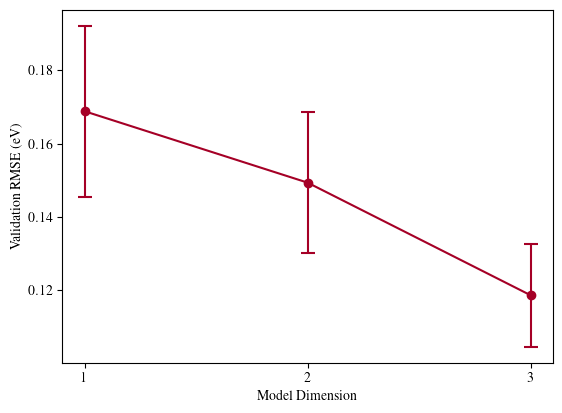

In [9]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse

plot_validation_rmse("cv*", "cv_10._error.png")

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est("cv*")
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

In [10]:
%%bash
for ii in `seq -f "%02g" 10 24`; do
    mkdir cv_$ii;
    cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
    cd cv_$ii;
    sisso++;
    cd ../;
done

time input_parsing: 0.00101995 s
Time to generate feat space: 2.49069 s
Projection time: 0.026516 s
Time to get best features on rank : 3.09944e-05 s
Complete final combination/selection from all ranks: 8.2016e-05 s
Time for SIS: 0.07003 s
Time for l0-norm: 0.00502801 s
Projection time: 0.0330288 s
Time to get best features on rank : 3.69549e-05 s
Complete final combination/selection from all ranks: 0.000108957 s
Time for SIS: 0.0769858 s
Time for l0-norm: 0.000948906 s
Projection time: 0.041064 s
Time to get best features on rank : 1.78814e-05 s
Complete final combination/selection from all ranks: 6.10352e-05 s
Time for SIS: 0.080792 s
Time for l0-norm: 0.00201511 s
Train RMSE: 0.127182 eV; Test RMSE: 0.115331 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0943089 eV; Test RMSE: 0.0820956 eV
c0 + a0 * ((|r_sigma - r_s_B|) * (EA_B - IP_A)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0738783 eV; Test RMSE: 0.0689402 eV
c0 + a0 * ((|Z_B - Z_A|) / 

[0.1532408  0.12035599 0.10396523]
[0.01003471 0.01184062 0.00804435]


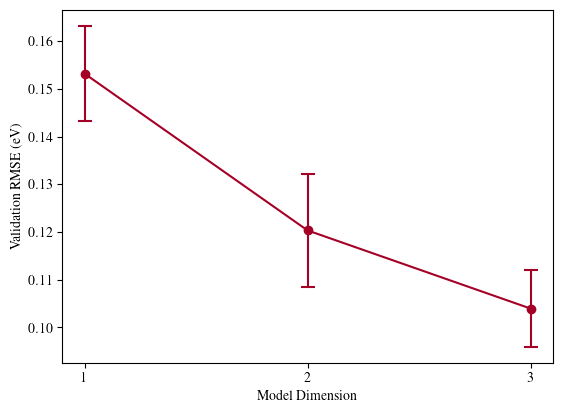

In [11]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse

plot_validation_rmse("cv*", "cv_25._error.png")

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est("cv*")
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sissopp/postprocess/plot/cv_error_plot.py:124: RuntimeWarning: Mean of empty slice
  validation_samp_mean = np.nanmean(validation_error, axis=1)
/tmp/ipykernel_4184491/467443046.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  plot_errors_dists("cv*", "error_cv_dist.png").show()
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sissopp/postprocess/plot/cv_error_plot.py:323: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(
/tmp/ipykernel_4184491/467443046.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_errors_dists("cv*", "error_cv_dist.png").show()


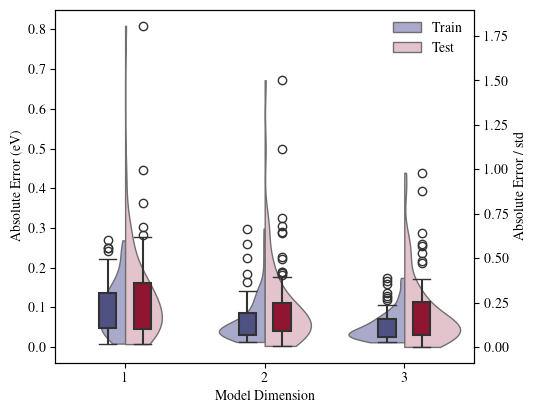

In [12]:
from sissopp.postprocess.plot.cv_error_plot import plot_errors_dists
plot_errors_dists("cv*", "error_cv_dist.png").show()

In [13]:
import pandas as pd
from sissopp.postprocess.get_model_errors import get_model_errors

df = pd.read_csv(data_file, index_col=0)

te, ve = get_model_errors("cv*", True)
max_err_ind = np.nanmean(ve, axis=1).argmax(axis=0)
print(df.index[max_err_ind])

Index(['AgF', 'AgF', 'AgF'], dtype='object', name='# Material')


/tmp/ipykernel_4184491/929146597.py:7: RuntimeWarning: Mean of empty slice
  max_err_ind = np.nanmean(ve, axis=1).argmax(axis=0)


In [14]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": "SSSS",
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": "RRRR",
    "n_models_store": 1,
    "leave_out_frac": 0.10,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [15]:
%%bash

for ns in 10; do # Leaving out ns to reduce the calculation time
    for nr in 1 5 10; do
        export cv_direc=ns_"$ns"_nr_"$nr"
        mkdir $cv_direc;
        cp $SISSOPP_TUT_DAT_FILE $cv_direc/;
        sed "s/SSSS/$ns/g" sisso.json > $cv_direc/sisso.json;
        sed -i "s/RRRR/$nr/g" $cv_direc/sisso.json;
    done
done

if [ -d cv_00 ]; then
    mv cv* ns_10_nr_10
fi

In [16]:
%%bash
export CV_N_RUN=4 # This should be 99, but we are using 4 to reduce computational time

for direc in ns_*; do
    cd $direc;
    pwd;
    if [ ! -d cv_00 ]; then
        for ii in `seq -f "%02g" 0 $CV_N_RUN`; do
            mkdir cv_$ii;
            cp sisso.json $SISSOPP_TUT_DAT_FILE cv_$ii;
            cd cv_$ii;
            sisso++;
            cd ../;
        done
    fi
    cd ../;
done

/home/purcellt/git/sissopp/docs/tutorial/notebook/ns_10_nr_1
time input_parsing: 0.000948191 s
Time to generate feat space: 2.49138 s
Projection time: 0.025835 s
Time to get best features on rank : 2.71797e-05 s
Complete final combination/selection from all ranks: 8.60691e-05 s
Time for SIS: 0.0661559 s
Time for l0-norm: 0.0054369 s
Projection time: 0.028317 s
Time to get best features on rank : 3.60012e-05 s
Complete final combination/selection from all ranks: 0.000113964 s
Time for SIS: 0.070894 s
Time for l0-norm: 0.000814199 s
Projection time: 0.034539 s
Time to get best features on rank : 3.60012e-05 s
Complete final combination/selection from all ranks: 0.000103951 s
Time for SIS: 0.075896 s
Time for l0-norm: 0.00163388 s
Train RMSE: 0.123481 eV; Test RMSE: 0.155366 eV
c0 + a0 * ((r_pi - r_s_A) / (r_s_A^3))

Train RMSE: 0.0967028 eV; Test RMSE: 0.0511085 eV
c0 + a0 * ((|r_sigma - r_s_B|) * (EA_B - IP_A)) + a1 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.0753506 eV; T

In [17]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
import numpy as np

print_str= ""
# Leaving out ns to reduce the calculation time
for ns in [10]:
    for nr in [1, 5, 10]:
        mean_err, var_err = jackknife_cv_conv_est(f"ns_{ns}_nr_{nr}/cv*")
        print_str += f"ns: {ns:3d}; nr: {nr:3d}; {mean_err[:3]} {np.sqrt(var_err[:3])}\n"

print(print_str)

ns:  10; nr:   1; [0.16386209 0.11577667 0.12921559] [0.01615122 0.02674951 0.02437679]
ns:  10; nr:   5; [0.13252772 0.1122584  0.09601108] [0.00658344 0.01950652 0.01054126]
ns:  10; nr:  10; [0.1532408  0.12035599 0.10396523] [0.01003471 0.01184062 0.00804435]



In [18]:
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": 3,
    "n_sis_select": 100,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

In [19]:
%%bash
pwd
sisso++

/home/purcellt/git/sissopp/docs/tutorial/notebook
time input_parsing: 0.000902176 s
Time to generate feat space: 2.48233 s
Projection time: 0.0253322 s
Time to get best features on rank : 0.000114202 s
Complete final combination/selection from all ranks: 0.000414133 s
Time for SIS: 0.067055 s
Time for l0-norm: 0.0120699 s
Projection time: 0.0356958 s
Time to get best features on rank : 0.000164986 s
Complete final combination/selection from all ranks: 0.00040102 s
Time for SIS: 0.0833118 s
Time for l0-norm: 0.00498199 s
Projection time: 0.0422568 s
Time to get best features on rank : 0.000144005 s
Complete final combination/selection from all ranks: 0.000374079 s
Time for SIS: 0.0858259 s
Time for l0-norm: 0.959195 s
Train RMSE: 0.125912 eV
c0 + a0 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

Train RMSE: 0.092432 eV
c0 + a0 * ((|r_sigma - r_s_B|) * (EA_B - IP_A)) + a1 * ((IP_A / r_p_A) / (r_p_B + r_p_A))

Train RMSE: 0.0705615 eV
c0 + a0 * ((r_d_B / r_d_A) * (r_p_B * E_HOMO_A)) + a1 * (

/tmp/ipykernel_4184491/623812864.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_model_parity_plot("models/train_dim_3_model_0.dat", filename="3d_model.pdf").show()


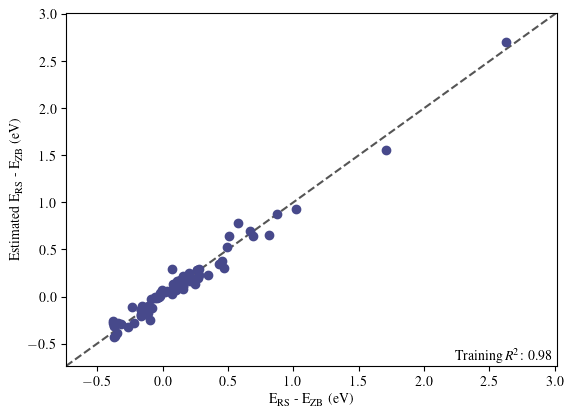

In [20]:
from sissopp.postprocess.plot.parity_plot import plot_model_parity_plot
plot_model_parity_plot("models/train_dim_3_model_0.dat", filename="3d_model.pdf").show()

In [21]:
from sissopp.postprocess.load_models import load_model
model = load_model("models/train_dim_3_model_0.dat")
print(model.latex_str)

model.write_matlab_fxn("matlab_fxn/model.m")

$c_0 + a_0\left(\left(\frac{ r_{d, B} }{ r_{d, A} } \right) \left(r_{p, B} E_{HOMO, A}\right)\right) + a_1\left(\left(\left|r_{sigma} - r_{s, B}\right|\right) \left(IP_{A}^3\right)\right) + a_2\left(\frac{ \left(\frac{ IP_{A} }{ r_{p, A} } \right) }{ \left(r_{p, B} + r_{p, A}\right) } \right)$


# The Python Interface

In [22]:
from sissopp import Inputs
sisso_json = {
    "data_file": data_file,
    "property_key": "E_RS - E_ZB",
    "desc_dim": max_dim,
    "n_sis_select": 10,
    "max_rung": 2,
    "calc_type": "regression",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 10,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

inputs = Inputs("sisso.json")

In [23]:
from sissopp.py_interface import read_csv
inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=2, leave_out_frac=0.0)
inputs.allowed_ops = [
    "exp",
    "neg_exp",
    "inv",
    "sq",
    "cb",
    "six_pow",
    "sqrt",
    "cbrt",
    "log",
    "abs",
    "sin",
    "cos",
    "add",
    "sub",
    "abs_diff",
    "mult",
    "div"
]
inputs.n_sis_select = 10
inputs.n_dim = max_dim
inputs.calc_type = "regression"
inputs.n_residual = 10
inputs.n_models_store = 1

In [24]:
import numpy as np
import pandas as pd
from sissopp import Inputs, Unit, FeatureNode
df = pd.read_csv(data_file, index_col=0)
inputs = Inputs()
inputs.allowed_ops = [
    "exp",
    "neg_exp",
    "inv",
    "sq",
    "cb",
    "six_pow",
    "sqrt",
    "cbrt",
    "log",
    "abs",
    "sin",
    "cos",
    "add",
    "sub",
    "abs_diff",
    "mult",
    "div"
]
inputs.n_sis_select = 10
inputs.max_rung = 2
inputs.n_dim = max_dim
inputs.calc_type = "regression"
inputs.n_residual = 10
inputs.n_models_store = 1
inputs.leave_out_inds = []
inputs.task_names = ["all_mats"]
inputs.task_sizes_train = [82]
inputs.task_sizes_test = [0]
inputs.prop_train = df["E_RS - E_ZB (eV)"].to_numpy()
inputs.prop_test = np.array([])
inputs.prop_label = "E_RS - E_ZB"
inputs.prop_unit = Unit("eV")
inputs.sample_ids_train = df.index.tolist()
inputs.sample_ids_test = []
inputs.phi_out_file = "phi.txt"
phi_0 = []
for cc, col in enumerate(df.columns[1:]):
    expr = col.split("(")[0].strip()
    if len(col.split("(")) == 2:
        unit = Unit(col.split("(")[1].split(")")[0].strip())
    else:
        unit = Unit()
    phi_0.append(FeatureNode(cc, expr, df[col].tolist(), [], unit))

inputs.phi_0 = phi_0

In [25]:
from sissopp.py_interface import get_fs_solver

feature_space, sisso = get_fs_solver(inputs, allow_overwrite=True)

Time to generate feat space: 3.44842 s


In [26]:
from sissopp import FeatureSpace, SISSORegressor

feature_space = FeatureSpace(inputs)
sisso = SISSORegressor(inputs, feature_space)

Time to generate feat space: 3.42981 s


In [27]:
sisso.fit()

Projection time: 0.030329 s
Time to get best features on rank : 2.21729e-05 s
Complete final combination/selection from all ranks: 6.69956e-05 s
Time for SIS: 0.072 s
Time for l0-norm: 0.00973892 s
Projection time: 0.033344 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 6.00815e-05 s
Time for SIS: 0.074168 s
Time for l0-norm: 0.00102687 s
Projection time: 0.032536 s
Time to get best features on rank : 2.19345e-05 s
Complete final combination/selection from all ranks: 6.10352e-05 s
Time for SIS: 0.074734 s
Time for l0-norm: 0.0020442 s


In [28]:
sisso.models[-1][0]

c0 + a0 * ((r_d_B * Z_A) / (|r_p_B - r_s_B|)) + a1 * ((|r_sigma - r_s_B|) * (|EA_B - IP_A|)) + a2 * ((E_HOMO_B / r_p_A) / (r_sigma + r_p_B))

In [29]:
from pathlib import Path
import os

from sissopp import Inputs
from sissopp.py_interface import read_csv, get_fs_solver

sisso_regs = []
inputs_base = Inputs("sisso.json")

# This should be 100, but using 10 to speed up the calculation
for ii in range(10):
    work_dir = Path(f"cv_{ii:02d}")
    work_dir.mkdir(exist_ok=True)
    os.chdir(work_dir)
    inputs = read_csv(f"../{data_file}", inputs_base.prop_key, inputs=inputs_base, leave_out_frac= 0.05)
    feature_space, sisso = get_fs_solver(inputs)
    sisso.fit()
    sisso_regs.append(sisso)
    os.chdir("../")


Time to generate feat space: 2.48796 s
Projection time: 0.025147 s
Time to get best features on rank : 1.50204e-05 s
Complete final combination/selection from all ranks: 6.19888e-05 s
Time for SIS: 0.0650611 s
Time for l0-norm: 0.0104921 s
Projection time: 0.029794 s
Time to get best features on rank : 2.00272e-05 s
Complete final combination/selection from all ranks: 5.60284e-05 s
Time for SIS: 0.070668 s
Time for l0-norm: 0.0010469 s
Projection time: 0.0305979 s
Time to get best features on rank : 3.50475e-05 s
Complete final combination/selection from all ranks: 0.000112057 s
Time for SIS: 0.07601 s
Time for l0-norm: 0.00240993 s
Time to generate feat space: 2.52209 s
Projection time: 0.024106 s
Time to get best features on rank : 2.40803e-05 s
Complete final combination/selection from all ranks: 7.98702e-05 s
Time for SIS: 0.066226 s
Time for l0-norm: 0.000949144 s
Projection time: 0.029588 s
Time to get best features on rank : 2.00272e-05 s
Complete final combination/selection fro

[0.17267315 0.13104059 0.1022147 ]
[0.02772791 0.0270212  0.01435216]


/tmp/ipykernel_4184491/1053548698.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_validation_rmse(models, "cv_10_error.pdf").show()


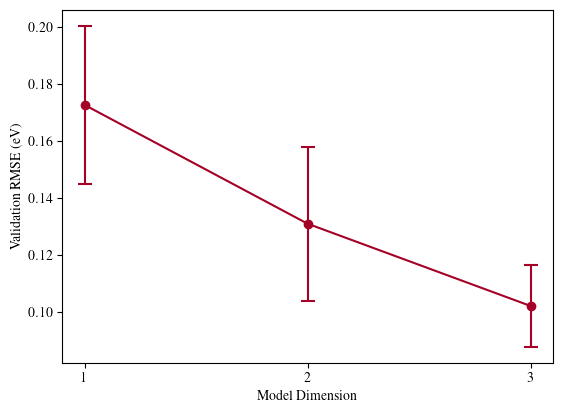

In [30]:
from sissopp.postprocess.check_cv_convergence import jackknife_cv_conv_est
from sissopp.postprocess.plot.cv_error_plot import plot_validation_rmse
import numpy as np
    
models = np.array([[reg.models[dim][0] for reg in sisso_regs] for dim in range(max_dim)])

mean_val_rmse, var_val_rmse = jackknife_cv_conv_est(models)
print(mean_val_rmse)
print(np.sqrt(var_val_rmse))

plot_validation_rmse(models, "cv_10_error.pdf").show()

In [31]:
from sissopp import phi_selected_from_file, FeatureSpace
from sissopp.py_interface import read_csv

inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=0, leave_out_frac=0.0)
phi_sel = phi_selected_from_file("feature_space/selected_features.txt", inputs.phi_0)
inputs.phi_0 = phi_sel
feature_space = FeatureSpace(inputs)
print(len(feature_space.phi))

30
Time to generate feat space: 9.53674e-07 s


Warning requested calculation has a maximum rung of 0
Warning requested calculation has a maximum rung of 0


In [32]:
from sissopp import phi_selected_from_file, FeatureSpace
from sissopp.py_interface import read_csv

inputs = read_csv(data_file, prop_key="E_RS - E_ZB", max_rung=0, leave_out_frac=0.0)
inputs.n_dim = max_dim
feature_space = FeatureSpace(
    "phi.txt",
    inputs.phi_0,
    inputs.prop_train,
    [82],
    project_type='regression',
    cross_corr_max=1.0,
    n_sis_select=100
)
print(len(feature_space.phi))
sisso = SISSORegressor(inputs, feature_space)
sisso.fit()

Warning requested calculation has a maximum rung of 0
Warning requested calculation has a maximum rung of 0


582210
Projection time: 0.0549161 s
Time to get best features on rank : 0.000154972 s
Complete final combination/selection from all ranks: 0.000404119 s
Time for SIS: 0.100328 s
Time for l0-norm: 0.000624895 s
Projection time: 0.0589359 s
Time to get best features on rank : 0.000159025 s
Complete final combination/selection from all ranks: 0.000417948 s
Time for SIS: 0.107554 s
Time for l0-norm: 0.00365496 s
Projection time: 0.0657439 s
Time to get best features on rank : 0.000163794 s
Complete final combination/selection from all ranks: 0.000442982 s
Time for SIS: 0.12392 s
Time for l0-norm: 1.20378 s


In [33]:
from sissopp.postprocess.load_models import load_model
from sissopp.py_interface.import_dataframe import strip_units

model = load_model("models/train_dim_3_model_0.dat")
data_predict = strip_units(data_file)
y_true = data_predict["E_RS - E_ZB"]
data_predict.drop(columns=["E_RS - E_ZB"], inplace=True)

In [34]:
y_pred = model.eval(data_predict.loc["C2", :].values)
print(y_pred)

2.6014256262712045


In [35]:
data_dict = {col: data_predict.loc["C2", col] for col in data_predict.columns}
y_pred = model.eval(data_dict)
print(y_pred)

2.6014256262712045


In [36]:
sample_ids = ["C2", "Si2", "Ge2"]
y_pred = model.eval_many(data_predict.loc[sample_ids, :].values)
print(y_pred)

data_dict = {col: data_predict.loc[sample_ids, col].values for col in data_predict.columns}
y_pred = model.eval_many(data_dict)
print(y_pred)

[2.60142563 0.25088082 0.20091549]
[2.60142563 0.25088082 0.20091549]


In [37]:
model.prediction_to_file(
    "model_predict/predict_from_dict_dim_3_model_0.dat",
    y_true[sample_ids],
    data_dict,
    sample_ids,
    [], # Task ID's if applicable
)

model.prediction_to_file(
    "model_predict/predict_from_arr_dim_3_model_0.dat",
    y_true[sample_ids],
    data_predict.loc[sample_ids, :],
    sample_ids,
    [], # Task ID's if applicable
)

# The `scikit-learn` Interface

In [38]:
import numpy as np
import pandas as pd
from sissopp.sklearn import SISSORegressor
df = pd.read_csv(data_file, index_col=0)
sisso = SISSORegressor(
    prop_label = "E_RS - E_ZB",
    prop_unit = "eV",
    allowed_ops = "all",
    n_dim = max_dim,
    max_rung = 2,
    n_sis_select = 10,
    n_residual = 10,
)

In [39]:
import numpy as np
import pandas as pd
from sissopp.sklearn import SISSORegressor
from sissopp.py_interface import read_csv

df = pd.read_csv(data_file, index_col=0)
inputs = read_csv(df, prop_key="E_RS - E_ZB", max_rung=2)
inputs.n_sis_select = 10
inputs.n_dim = max_dim
inputs.n_residual = 10
inputs.allowed_ops = ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
sisso = SISSORegressor.from_inputs(inputs)

In [40]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0].values
sisso.fit(X, y)

Time to generate feat space: 2.53808 s
Projection time: 0.0265558 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 8.67844e-05 s
Time for SIS: 0.0670872 s
Time for l0-norm: 0.00117302 s
Projection time: 0.0323009 s
Time to get best features on rank : 2.88486e-05 s
Complete final combination/selection from all ranks: 0.000109911 s
Time for SIS: 0.0742021 s
Time for l0-norm: 0.00120187 s
Projection time: 0.0342472 s
Time to get best features on rank : 3.29018e-05 s
Complete final combination/selection from all ranks: 0.000117064 s
Time for SIS: 0.080168 s
Time for l0-norm: 0.00245905 s


In [41]:
from sissopp.sklearn import regression_metric
from sklearn.metrics import mean_absolute_error

y_pred = sisso.predict(X)
rmse = regression_metric(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(rmse, mae)

0.07255222356607217 0.055532954162035034


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
%%bash
ls SISSO_*

feature_space
models


In [43]:
sisso.workdir = "sklearn_sisso_test"
sisso.fit(X, y)

Time to generate feat space: 2.55539 s
Projection time: 0.026252 s
Time to get best features on rank : 2.19345e-05 s
Complete final combination/selection from all ranks: 6.58035e-05 s
Time for SIS: 0.0673468 s
Time for l0-norm: 0.0105 s
Projection time: 0.035331 s
Time to get best features on rank : 2.31266e-05 s
Complete final combination/selection from all ranks: 7.89165e-05 s
Time for SIS: 0.0780518 s
Time for l0-norm: 0.0010519 s
Projection time: 0.0338991 s
Time to get best features on rank : 2.5034e-05 s
Complete final combination/selection from all ranks: 7.51019e-05 s
Time for SIS: 0.0820549 s
Time for l0-norm: 0.00192785 s


In [44]:
%%bash
ls sklearn_sisso_test/

feature_space
models


In [45]:
sisso.workdir = "sklearn_sisso_test_cleaned"
sisso.clean_workdir = True
sisso.fit(X, y)

Time to generate feat space: 2.73245 s
Projection time: 0.0371799 s
Time to get best features on rank : 2.69413e-05 s
Complete final combination/selection from all ranks: 6.29425e-05 s
Time for SIS: 0.0834942 s
Time for l0-norm: 0.0103979 s
Projection time: 0.0399141 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 5.4121e-05 s
Time for SIS: 0.0816579 s
Time for l0-norm: 0.000942945 s
Projection time: 0.0365791 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 5.79357e-05 s
Time for SIS: 0.0838859 s
Time for l0-norm: 0.00191784 s


In [46]:
%%bash
ls

3d_model.pdf
cv_00
cv_01
cv_02
cv_03
cv_04
cv_05
cv_06
cv_07
cv_08
cv_09
cv_10_error.pdf
error_cv_dist.png
feature_space
matlab_fxn
model_predict
models
ns_10_nr_1
ns_10_nr_10
ns_10_nr_5
phi.txt
SISSO_2024-07-12_14:50:42
sisso.json
sissopp_tut_data.csv
sissopp_tutorial.ipynb
sklearn_sisso_test


In [47]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer
from sissopp.sklearn import get_default_model_metric

kf = KFold(n_splits=10, random_state=13, shuffle=True)

metric = get_default_model_metric(sisso)
scorer = make_scorer(metric, greater_is_better=False)

sisso.workdir = None
sisso.clean_workdir = False

cv_results = cross_validate(sisso, X, y, cv=kf, scoring=scorer)
print(cv_results["test_score"].mean())

Time to generate feat space: 2.6896 s
Projection time: 0.0258591 s
Time to get best features on rank : 1.50204e-05 s
Complete final combination/selection from all ranks: 6.19888e-05 s
Time for SIS: 0.0694041 s
Time for l0-norm: 0.00139904 s
Projection time: 0.032887 s
Time to get best features on rank : 2.81334e-05 s
Complete final combination/selection from all ranks: 7.10487e-05 s
Time for SIS: 0.077461 s
Time for l0-norm: 0.00123405 s
Projection time: 0.0328441 s
Time to get best features on rank : 1.78814e-05 s
Complete final combination/selection from all ranks: 5.81741e-05 s
Time for SIS: 0.0770361 s
Time for l0-norm: 0.00170612 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.72498 s
Projection time: 0.0273941 s
Time to get best features on rank : 2.47955e-05 s
Complete final combination/selection from all ranks: 5.38826e-05 s
Time for SIS: 0.0727861 s
Time for l0-norm: 0.000994921 s
Projection time: 0.035095 s
Time to get best features on rank : 3.60012e-05 s
Complete final combination/selection from all ranks: 9.5129e-05 s
Time for SIS: 0.081248 s
Time for l0-norm: 0.00127697 s
Projection time: 0.034761 s
Time to get best features on rank : 3.29018e-05 s
Complete final combination/selection from all ranks: 9.70364e-05 s
Time for SIS: 0.0757501 s
Time for l0-norm: 0.00246406 s
Time to generate feat space: 2.55843 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Projection time: 0.024189 s
Time to get best features on rank : 1.69277e-05 s
Complete final combination/selection from all ranks: 6.81877e-05 s
Time for SIS: 0.0651081 s
Time for l0-norm: 0.00095892 s
Projection time: 0.0294929 s
Time to get best features on rank : 2.7895e-05 s
Complete final combination/selection from all ranks: 8.79765e-05 s
Time for SIS: 0.073544 s
Time for l0-norm: 0.00139213 s
Projection time: 0.0350561 s
Time to get best features on rank : 3.00407e-05 s
Complete final combination/selection from all ranks: 9.29832e-05 s
Time for SIS: 0.0808539 s
Time for l0-norm: 0.00225091 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.49878 s
Projection time: 0.024677 s
Time to get best features on rank : 1.4782e-05 s
Complete final combination/selection from all ranks: 5.50747e-05 s
Time for SIS: 0.0649459 s
Time for l0-norm: 0.00136113 s
Projection time: 0.038316 s
Time to get best features on rank : 2.00272e-05 s
Complete final combination/selection from all ranks: 5.29289e-05 s
Time for SIS: 0.0791309 s
Time for l0-norm: 0.00102091 s
Projection time: 0.0306141 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 5.4121e-05 s
Time for SIS: 0.0729511 s
Time for l0-norm: 0.00204587 s
Time to generate feat space: 2.6797 s
Projection time: 0.025408 s
Time to get best features on rank : 2.28882e-05 s
Complete final combination/selection from all ranks: 6.69956e-05 s
Time for SIS: 0.0687761 s
Time for l0-norm: 0.0011611 s
Projection time: 0.0406859 s
Time to get best features on rank : 2.31266e-05 s
Complete final combination/selection f

/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.76863 s
Projection time: 0.0320401 s
Time to get best features on rank : 2.31266e-05 s
Complete final combination/selection from all ranks: 6.98566e-05 s
Time for SIS: 0.0909231 s
Time for l0-norm: 0.00159287 s
Projection time: 0.047586 s
Time to get best features on rank : 2.40803e-05 s
Complete final combination/selection from all ranks: 6.10352e-05 s
Time for SIS: 0.111715 s
Time for l0-norm: 0.00105214 s
Projection time: 0.0463929 s
Time to get best features on rank : 1.90735e-05 s
Complete final combination/selection from all ranks: 5.91278e-05 s
Time for SIS: 0.110449 s
Time for l0-norm: 0.00203681 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.9243 s
Projection time: 0.0272391 s
Time to get best features on rank : 2.00272e-05 s
Complete final combination/selection from all ranks: 5.79357e-05 s
Time for SIS: 0.0659881 s
Time for l0-norm: 0.00149298 s
Projection time: 0.0348711 s
Time to get best features on rank : 2.59876e-05 s
Complete final combination/selection from all ranks: 8.91685e-05 s
Time for SIS: 0.0846601 s
Time for l0-norm: 0.00139403 s
Projection time: 0.0366259 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 5.29289e-05 s
Time for SIS: 0.0868239 s
Time for l0-norm: 0.00177217 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.71113 s
Projection time: 0.0264521 s
Time to get best features on rank : 1.40667e-05 s
Complete final combination/selection from all ranks: 6.00815e-05 s
Time for SIS: 0.068011 s
Time for l0-norm: 0.00101614 s
Projection time: 0.031707 s
Time to get best features on rank : 2.59876e-05 s
Complete final combination/selection from all ranks: 9.70364e-05 s
Time for SIS: 0.076323 s
Time for l0-norm: 0.00169516 s
Projection time: 0.048882 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 5.60284e-05 s
Time for SIS: 0.092164 s
Time for l0-norm: 0.0018611 s
Time to generate feat space: 2.7092 s
Projection time: 0.024858 s
Time to get best features on rank : 2.38419e-05 s
Complete final combination/selection from all ranks: 5.79357e-05 s
Time for SIS: 0.0686049 s
Time for l0-norm: 0.00130415 s
Projection time: 0.0327549 s
Time to get best features on rank : 2.00272e-05 s
Complete final combination/selection fr

/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
sisso.workdir = "cv_test"

cv_results = cross_validate(sisso, X, y, cv=kf, scoring=scorer)
print(cv_results["test_score"].mean())

Time to generate feat space: 2.52644 s
Projection time: 0.024127 s
Time to get best features on rank : 1.88351e-05 s
Complete final combination/selection from all ranks: 7.00951e-05 s
Time for SIS: 0.0646989 s
Time for l0-norm: 0.00138497 s
Projection time: 0.0302799 s
Time to get best features on rank : 2.59876e-05 s
Complete final combination/selection from all ranks: 0.000113964 s
Time for SIS: 0.0743542 s
Time for l0-norm: 0.0014441 s
Projection time: 0.0337179 s
Time to get best features on rank : 1.5974e-05 s
Complete final combination/selection from all ranks: 6.60419e-05 s
Time for SIS: 0.0736592 s
Time for l0-norm: 0.0024941 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.73198 s
Projection time: 0.0347571 s
Time to get best features on rank : 2.19345e-05 s
Complete final combination/selection from all ranks: 7.39098e-05 s
Time for SIS: 0.0787809 s
Time for l0-norm: 0.00168586 s
Projection time: 0.0347261 s
Time to get best features on rank : 2.21729e-05 s
Complete final combination/selection from all ranks: 6.60419e-05 s
Time for SIS: 0.080363 s
Time for l0-norm: 0.00101185 s
Projection time: 0.034291 s
Time to get best features on rank : 1.5974e-05 s
Complete final combination/selection from all ranks: 6.60419e-05 s
Time for SIS: 0.0797229 s
Time for l0-norm: 0.00191498 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.735 s
Projection time: 0.0280211 s
Time to get best features on rank : 2.28882e-05 s
Complete final combination/selection from all ranks: 8.41618e-05 s
Time for SIS: 0.073488 s
Time for l0-norm: 0.00119114 s
Projection time: 0.0329962 s
Time to get best features on rank : 2.28882e-05 s
Complete final combination/selection from all ranks: 7.98702e-05 s
Time for SIS: 0.0793481 s
Time for l0-norm: 0.000993013 s
Projection time: 0.0324881 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 8.41618e-05 s
Time for SIS: 0.0779438 s
Time for l0-norm: 0.00198007 s
Time to generate feat space: 2.70103 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Projection time: 0.026917 s
Time to get best features on rank : 1.50204e-05 s
Complete final combination/selection from all ranks: 9.58443e-05 s
Time for SIS: 0.0710628 s
Time for l0-norm: 0.000782013 s
Projection time: 0.03281 s
Time to get best features on rank : 1.5974e-05 s
Complete final combination/selection from all ranks: 6.69956e-05 s
Time for SIS: 0.078038 s
Time for l0-norm: 0.00105309 s
Projection time: 0.0322981 s
Time to get best features on rank : 1.90735e-05 s
Complete final combination/selection from all ranks: 6.38962e-05 s
Time for SIS: 0.0778019 s
Time for l0-norm: 0.00204086 s
Time to generate feat space: 2.52167 s
Projection time: 0.0278921 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 7.51019e-05 s
Time for SIS: 0.0805209 s
Time for l0-norm: 0.00141907 s
Projection time: 0.0402601 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 6.41346e-05 s
Time fo

/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.61897 s
Projection time: 0.0242171 s
Time to get best features on rank : 1.50204e-05 s
Complete final combination/selection from all ranks: 7.29561e-05 s
Time for SIS: 0.065119 s
Time for l0-norm: 0.00147295 s
Projection time: 0.0350571 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 7.9155e-05 s
Time for SIS: 0.085901 s
Time for l0-norm: 0.00124502 s
Projection time: 0.0364809 s
Time to get best features on rank : 1.5974e-05 s
Complete final combination/selection from all ranks: 6.91414e-05 s
Time for SIS: 0.0869231 s
Time for l0-norm: 0.00245285 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.75513 s
Projection time: 0.0348721 s
Time to get best features on rank : 2.5034e-05 s
Complete final combination/selection from all ranks: 7.89165e-05 s
Time for SIS: 0.0789988 s
Time for l0-norm: 0.00144291 s
Projection time: 0.033453 s
Time to get best features on rank : 0.000124216 s
Complete final combination/selection from all ranks: 6.38962e-05 s
Time for SIS: 0.0768549 s
Time for l0-norm: 0.00102901 s
Projection time: 0.032824 s
Time to get best features on rank : 1.97887e-05 s
Complete final combination/selection from all ranks: 5.91278e-05 s
Time for SIS: 0.0730422 s
Time for l0-norm: 0.00181103 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.64767 s
Projection time: 0.0247922 s
Time to get best features on rank : 1.5974e-05 s
Complete final combination/selection from all ranks: 6.8903e-05 s
Time for SIS: 0.0647879 s
Time for l0-norm: 0.001508 s
Projection time: 0.0319672 s
Time to get best features on rank : 1.50204e-05 s
Complete final combination/selection from all ranks: 6.00815e-05 s
Time for SIS: 0.0715232 s
Time for l0-norm: 0.00139785 s
Projection time: 0.0338809 s
Time to get best features on rank : 3.29018e-05 s
Complete final combination/selection from all ranks: 0.000121832 s
Time for SIS: 0.0789781 s
Time for l0-norm: 0.00248504 s


/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Time to generate feat space: 2.52785 s
Projection time: 0.029635 s
Time to get best features on rank : 2.09808e-05 s
Complete final combination/selection from all ranks: 6.19888e-05 s
Time for SIS: 0.070508 s
Time for l0-norm: 0.00139904 s
Projection time: 0.032377 s
Time to get best features on rank : 1.40667e-05 s
Complete final combination/selection from all ranks: 6.00815e-05 s
Time for SIS: 0.0717061 s
Time for l0-norm: 0.001302 s
Projection time: 0.0302742 s
Time to get best features on rank : 1.81198e-05 s
Complete final combination/selection from all ranks: 6.10352e-05 s
Time for SIS: 0.0712042 s
Time for l0-norm: 0.00181198 s
Time to generate feat space: 2.52509 s
Projection time: 0.0244489 s
Time to get best features on rank : 2.19345e-05 s
Complete final combination/selection from all ranks: 7.70092e-05 s
Time for SIS: 0.0683532 s
Time for l0-norm: 0.00115395 s
Projection time: 0.039618 s
Time to get best features on rank : 2.40803e-05 s
Complete final combination/selection 

/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/purcellt/intelpython3/envs/sissopp_env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
%%bash
ls cv_test/

feature_space
models


In [ ]:
from sissopp.sklearn import cross_validate_from_splitter

test_scores = cross_validate_from_splitter(X, y, sisso, kf, scoring=scorer)
print(np.mean(test_scores))

In [ ]:
%%bash
ls cv_test/

In [ ]:
%%bash
ls cv_test/cv_0/models/

# Performing Classification with SISSO++

In [ ]:
data_csv_lines = """# Material,Class,Z_A (nuc_charge) ,Z_B (nuc_charge) ,period_A,period_B,IP_A (eV_IP) ,IP_B (eV_IP) ,EA_A (eV_IP),EA_B (eV_IP) ,E_HOMO_A (eV) ,E_HOMO_B (eV) ,E_LUMO_A (eV),E_LUMO_B (eV) ,r_s_A ,r_s_B ,r_p_A ,r_p_B ,r_d_A ,r_d_B,r_sigma ,r_pi
AgBr,0,47,35,5,4,-8.0580997467,-12.649600029,-1.66659998894,-3.73930001259,-4.71000003815,-8.00100040436,-0.479000002146,0.708000004292,1.32000005245,0.75,1.87999999523,0.879999995232,2.97000002861,1.87000000477,1.570000052448,0.689999938012
AgCl,0,47,17,5,3,-8.0580997467,-13.9018001556,-1.66659998894,-3.97079992294,-4.71000003815,-8.69999980927,-0.479000002146,0.574000000954,1.32000005245,0.680000007153,1.87999999523,0.759999990463,2.97000002861,1.66999995708,1.760000050064,0.63999992609
AgF,0,47,9,5,2,-8.0580997467,-19.4043006897,-1.66659998894,-4.27349996567,-4.71000003815,-11.2939996719,-0.479000002146,1.25100004673,1.32000005245,0.409999996424,1.87999999523,0.370000004768,2.97000002861,1.42999994755,2.420000046488,0.599999934436
AgI,1,47,53,5,5,-8.0580997467,-11.2571001053,-1.66659998894,-3.5134999752,-4.71000003815,-7.23600006104,-0.479000002146,0.212999999523,1.32000005245,0.899999976158,1.87999999523,1.07000005245,2.97000002861,1.72000002861,1.230000019072,0.730000019072
AlAs,1,13,33,3,4,-5.78049993515,-9.26189994812,-0.3125,-1.83920001984,-2.78399991989,-5.34100008011,0.694999992847,0.0640000030398,1.09000003338,0.850000023842,1.38999998569,1.03999996185,1.94000005722,2.01999998093,0.590000033378,0.489999890318
AlN,1,13,7,3,2,-5.78049993515,-13.5852003098,-0.3125,-1.86749994755,-2.78399991989,-7.2389998436,0.694999992847,3.0569999218,1.09000003338,0.540000021458,1.38999998569,0.509999990463,1.94000005722,1.53999996185,1.430000007149,0.329999983305
AlP,1,13,15,3,3,-5.78049993515,-9.75059986115,-0.3125,-1.91999995708,-2.78399991989,-5.59600019455,0.694999992847,0.182999998331,1.09000003338,0.829999983311,1.38999998569,0.97000002861,1.94000005722,1.76999998093,0.680000007149,0.439999997609
AlSb,1,13,51,3,5,-5.78049993515,-8.46829986572,-0.3125,-1.84669995308,-2.78399991989,-4.99100017548,0.694999992847,0.104999996722,1.09000003338,1,1.38999998569,1.23000001907,1.94000005722,2.05999994278,0.25,0.52999997138
AsGa,1,31,33,4,4,-5.81820011139,-9.26189994812,-0.108099997044,-1.83920001984,-2.73200011253,-5.34100008011,0.129999995232,0.0640000030398,0.990000009537,0.850000023842,1.33000004292,1.03999996185,2.16000008583,2.01999998093,0.430000066765,0.529999971391
AsB,1,5,33,2,4,-8.18999958038,-9.26189994812,-0.107400000095,-1.83920001984,-3.71499991417,-5.34100008011,2.24799990654,0.0640000030398,0.810000002384,0.850000023842,0.829999983311,1.03999996185,1.95000004768,2.01999998093,0.249999999997,0.209999918935
BN,1,5,7,2,2,-8.18999958038,-13.5852003098,-0.107400000095,-1.86749994755,-3.71499991417,-7.2389998436,2.24799990654,3.0569999218,0.810000002384,0.540000021458,0.829999983311,0.509999990463,1.95000004768,1.53999996185,0.589999973774,0.050000011922
BP,1,5,15,2,3,-8.18999958038,-9.75059986115,-0.107400000095,-1.91999995708,-3.71499991417,-5.59600019455,2.24799990654,0.182999998331,0.810000002384,0.829999983311,0.829999983311,0.97000002861,1.95000004768,1.76999998093,0.160000026226,0.160000026226
BSb,1,5,51,2,5,-8.18999958038,-8.46829986572,-0.107400000095,-1.84669995308,-3.71499991417,-4.99100017548,2.24799990654,0.104999996722,0.810000002384,1,0.829999983311,1.23000001907,1.95000004768,2.05999994278,0.590000033375,0.249999999997
BaO,0,56,8,6,2,-5.51569986343,-16.4332008362,0.277999997139,-3.00589990616,-3.34599995613,-9.19699954987,-2.1289999485,2.54099988937,2.15000009537,0.460000008345,2.63000011444,0.430000007153,1.35000002384,2.22000002861,3.890000194312,0.510000020262
BaS,0,56,16,6,3,-5.51569986343,-11.7951002121,0.277999997139,-2.84489989281,-3.34599995613,-7.10599994659,-2.1289999485,0.64200001955,2.15000009537,0.740000009537,2.63000011444,0.850000023842,1.35000002384,2.36999988556,3.190000176431,0.590000033375
BaSe,0,56,34,6,4,-5.51569986343,-10.9460000992,0.277999997139,-2.75099992752,-3.34599995613,-6.65399980545,-2.1289999485,1.31599998474,2.15000009537,0.800000011921,2.63000011444,0.949999988079,1.35000002384,2.18000006676,3.03000020981,0.629999995228
BaTe,0,56,52,6,5,-5.51569986343,-9.86670017242,0.277999997139,-2.66599988937,-3.34599995613,-6.10900020599,-2.1289999485,0.0989999994636,2.15000009537,0.939999997616,2.63000011444,1.13999998569,1.35000002384,1.83000004292,2.700000226504,0.680000007144
BeO,1,4,8,2,2,-9.459400177,-16.4332008362,0.630500018597,-3.00589990616,-5.59999990463,-9.19699954987,-2.09800004959,2.54099988937,1.08000004292,0.460000008345,1.21000003815,0.430000007153,2.88000011444,2.22000002861,1.400000065572,0.159999996422
BeS,1,4,16,2,3,-9.459400177,-11.7951002121,0.630500018597,-2.84489989281,-5.59999990463,-7.10599994659,-2.09800004959,0.64200001955,1.08000004292,0.740000009537,1.21000003815,0.850000023842,2.88000011444,2.36999988556,0.700000047691,0.240000009535
BeSe,1,4,34,2,4,-9.459400177,-10.9460000992,0.630500018597,-2.75099992752,-5.59999990463,-6.65399980545,-2.09800004959,1.31599998474,1.08000004292,0.800000011921,1.21000003815,0.949999988079,2.88000011444,2.18000006676,0.54000008107,0.279999971388
BeTe,1,4,52,2,5,-9.459400177,-9.86670017242,0.630500018597,-2.66599988937,-5.59999990463,-6.10900020599,-2.09800004959,0.0989999994636,1.08000004292,0.939999997616,1.21000003815,1.13999998569,2.88000011444,1.83000004292,0.210000097764,0.329999983304
C2,1,6,6,2,2,-10.8516998291,-10.8516998291,-0.87239998579,-0.87239998579,-5.41599988937,-5.41599988937,1.99199998379,1.99199998379,0.639999985695,0.639999985695,0.629999995232,0.629999995232,1.62999999523,1.62999999523,0,0.019999980926
CaO,0,20,8,4,2,-6.4279999733,-16.4332008362,0.303900003433,-3.00589990616,-3.86400008202,-9.19699954987,-2.132999897,2.54099988937,1.75999999046,0.460000008345,2.31999993324,0.430000007153,0.680000007153,2.22000002861,3.189999908202,0.589999943972
CaS,0,20,16,4,3,-6.4279999733,-11.7951002121,0.303900003433,-2.84489989281,-3.86400008202,-7.10599994659,-2.132999897,0.64200001955,1.75999999046,0.740000009537,2.31999993324,0.850000023842,0.680000007153,2.36999988556,2.489999890321,0.669999957085
CaSe,0,20,34,4,4,-6.4279999733,-10.9460000992,0.303900003433,-2.75099992752,-3.86400008202,-6.65399980545,-2.132999897,1.31599998474,1.75999999046,0.800000011921,2.31999993324,0.949999988079,0.680000007153,2.18000006676,2.3299999237,0.709999918938
CaTe,0,20,52,4,5,-6.4279999733,-9.86670017242,0.303900003433,-2.66599988937,-3.86400008202,-6.10900020599,-2.132999897,0.0989999994636,1.75999999046,0.939999997616,2.31999993324,1.13999998569,0.680000007153,1.83000004292,1.999999940394,0.759999930854
CdO,0,48,8,5,2,-9.5813999176,-16.4332008362,0.838699996471,-3.00589990616,-5.95200014114,-9.19699954987,-1.30900001526,2.54099988937,1.23000001907,0.460000008345,1.74000000954,0.430000007153,2.59999990463,2.22000002861,2.080000013112,0.539999991662
CdS,1,48,16,5,3,-9.5813999176,-11.7951002121,0.838699996471,-2.84489989281,-5.95200014114,-7.10599994659,-1.30900001526,0.64200001955,1.23000001907,0.740000009537,1.74000000954,0.850000023842,2.59999990463,2.36999988556,1.379999995231,0.620000004775
CdSe,1,48,34,5,4,-9.5813999176,-10.9460000992,0.838699996471,-2.75099992752,-5.95200014114,-6.65399980545,-1.30900001526,1.31599998474,1.23000001907,0.800000011921,1.74000000954,0.949999988079,2.59999990463,2.18000006676,1.22000002861,0.659999966628
CdTe,1,48,52,5,5,-9.5813999176,-9.86670017242,0.838699996471,-2.66599988937,-5.95200014114,-6.10900020599,-1.30900001526,0.0989999994636,1.23000001907,0.939999997616,1.74000000954,1.13999998569,2.59999990463,1.83000004292,0.890000045304,0.709999978544
BrCs,0,55,35,6,4,-4.00619983673,-12.649600029,-0.569599986076,-3.73930001259,-2.22000002861,-8.00100040436,-0.547999978065,0.708000004292,2.46000003815,0.75,3.16000008583,0.879999995232,1.97000002861,1.87000000477,3.990000128748,0.830000042912
ClCs,0,55,17,6,3,-4.00619983673,-13.9018001556,-0.569599986076,-3.97079992294,-2.22000002861,-8.69999980927,-0.547999978065,0.574000000954,2.46000003815,0.680000007153,3.16000008583,0.759999990463,1.97000002861,1.66999995708,4.180000126364,0.78000003099
CsF,0,55,9,6,2,-4.00619983673,-19.4043006897,-0.569599986076,-4.27349996567,-2.22000002861,-11.2939996719,-0.547999978065,1.25100004673,2.46000003815,0.409999996424,3.16000008583,0.370000004768,1.97000002861,1.42999994755,4.840000122788,0.740000039336
CsI,0,55,53,6,5,-4.00619983673,-11.2571001053,-0.569599986076,-3.5134999752,-2.22000002861,-7.23600006104,-0.547999978065,0.212999999523,2.46000003815,0.899999976158,3.16000008583,1.07000005245,1.97000002861,1.72000002861,3.650000095372,0.870000123972
BrCu,1,29,35,4,4,-8.38879966736,-12.649600029,-1.6384999752,-3.73930001259,-4.85599994659,-8.00100040436,-0.64099997282,0.708000004292,1.20000004768,0.75,1.67999994755,0.879999995232,2.57999992371,1.87000000477,1.249999999998,0.609999895102
ClCu,1,29,17,4,3,-8.38879966736,-13.9018001556,-1.6384999752,-3.97079992294,-4.85599994659,-8.69999980927,-0.64099997282,0.574000000954,1.20000004768,0.680000007153,1.67999994755,0.759999990463,2.57999992371,1.66999995708,1.439999997614,0.55999988318
CuF,0,29,9,4,2,-8.38879966736,-19.4043006897,-1.6384999752,-4.27349996567,-4.85599994659,-11.2939996719,-0.64099997282,1.25100004673,1.20000004768,0.409999996424,1.67999994755,0.370000004768,2.57999992371,1.42999994755,2.099999994038,0.519999891526
CuI,1,29,53,4,5,-8.38879966736,-11.2571001053,-1.6384999752,-3.5134999752,-4.85599994659,-7.23600006104,-0.64099997282,0.212999999523,1.20000004768,0.899999976158,1.67999994755,1.07000005245,2.57999992371,1.72000002861,0.909999966622,0.649999976162
GaN,1,31,7,4,2,-5.81820011139,-13.5852003098,-0.108099997044,-1.86749994755,-2.73200011253,-7.2389998436,0.129999995232,3.0569999218,0.990000009537,0.540000021458,1.33000004292,0.509999990463,2.16000008583,1.53999996185,1.270000040536,0.370000064378
GaP,1,31,15,4,3,-5.81820011139,-9.75059986115,-0.108099997044,-1.91999995708,-2.73200011253,-5.59600019455,0.129999995232,0.182999998331,0.990000009537,0.829999983311,1.33000004292,0.97000002861,2.16000008583,1.76999998093,0.520000040536,0.480000078682
GaSb,1,31,51,4,5,-5.81820011139,-8.46829986572,-0.108099997044,-1.84669995308,-2.73200011253,-4.99100017548,0.129999995232,0.104999996722,0.990000009537,1,1.33000004292,1.23000001907,2.16000008583,2.05999994278,0.090000033387,0.570000052453
Ge2,1,32,32,4,4,-7.56699991226,-7.56699991226,-0.949000000954,-0.949000000954,-4.04600000381,-4.04600000381,2.17499995232,2.17499995232,0.920000016689,0.920000016689,1.15999996662,1.15999996662,2.36999988556,2.36999988556,0,0.479999899862
CGe,1,32,6,4,2,-7.56699991226,-10.8516998291,-0.949000000954,-0.87239998579,-4.04600000381,-5.41599988937,2.17499995232,1.99199998379,0.920000016689,0.639999985695,1.15999996662,0.629999995232,2.36999988556,1.62999999523,0.810000002382,0.249999940394
GeSi,1,32,14,4,3,-7.56699991226,-7.75769996643,-0.949000000954,-0.992999970913,-4.04600000381,-4.16300010681,2.17499995232,0.439999997616,0.920000016689,0.939999997616,1.15999996662,1.12999999523,2.36999988556,1.88999998569,0.009999990463,0.429999947545
AsIn,1,49,33,5,4,-5.53739976883,-9.26189994812,-0.256300002337,-1.83920001984,-2.6970000267,-5.34100008011,0.368000000715,0.0640000030398,1.12999999523,0.850000023842,1.5,1.03999996185,3.1099998951,2.01999998093,0.740000009538,0.559999942778
InN,1,49,7,5,2,-5.53739976883,-13.5852003098,-0.256300002337,-1.86749994755,-2.6970000267,-7.2389998436,0.368000000715,3.0569999218,1.12999999523,0.540000021458,1.5,0.509999990463,3.1099998951,1.53999996185,1.579999983309,0.400000035765
InP,1,49,15,5,3,-5.53739976883,-9.75059986115,-0.256300002337,-1.91999995708,-2.6970000267,-5.59600019455,0.368000000715,0.182999998331,1.12999999523,0.829999983311,1.5,0.97000002861,3.1099998951,1.76999998093,0.829999983309,0.510000050069
InSb,1,49,51,5,5,-5.53739976883,-8.46829986572,-0.256300002337,-1.84669995308,-2.6970000267,-4.99100017548,0.368000000715,0.104999996722,1.12999999523,1,1.5,1.23000001907,3.1099998951,2.05999994278,0.39999997616,0.60000002384
BrK,0,19,35,4,4,-4.43319988251,-12.649600029,-0.621299982071,-3.73930001259,-2.42600011826,-8.00100040436,-0.697000026703,0.708000004292,2.13000011444,0.75,2.44000005722,0.879999995232,1.78999996185,1.87000000477,2.940000176428,0.439999938012
ClK,0,19,17,4,3,-4.43319988251,-13.9018001556,-0.621299982071,-3.97079992294,-2.42600011826,-8.69999980927,-0.697000026703,0.574000000954,2.13000011444,0.680000007153,2.44000005722,0.759999990463,1.78999996185,1.66999995708,3.130000174044,0.38999992609
FK,0,19,9,4,2,-4.43319988251,-19.4043006897,-0.621299982071,-4.27349996567,-2.42600011826,-11.2939996719,-0.697000026703,1.25100004673,2.13000011444,0.409999996424,2.44000005722,0.370000004768,1.78999996185,1.42999994755,3.790000170468,0.349999934436
IK,0,19,53,4,5,-4.43319988251,-11.2571001053,-0.621299982071,-3.5134999752,-2.42600011826,-7.23600006104,-0.697000026703,0.212999999523,2.13000011444,0.899999976158,2.44000005722,1.07000005245,1.78999996185,1.72000002861,2.600000143052,0.480000019072
BrLi,0,3,35,2,4,-5.32910013199,-12.649600029,-0.698099970818,-3.73930001259,-2.87400007248,-8.00100040436,-0.977999985218,0.708000004292,1.64999997616,0.75,2,0.879999995232,6.92999982834,1.87000000477,2.019999980928,0.480000019072
ClLi,0,3,17,2,3,-5.32910013199,-13.9018001556,-0.698099970818,-3.97079992294,-2.87400007248,-8.69999980927,-0.977999985218,0.574000000954,1.64999997616,0.680000007153,2,0.759999990463,6.92999982834,1.66999995708,2.209999978544,0.43000000715
FLi,0,3,9,2,2,-5.32910013199,-19.4043006897,-0.698099970818,-4.27349996567,-2.87400007248,-11.2939996719,-0.977999985218,1.25100004673,1.64999997616,0.409999996424,2,0.370000004768,6.92999982834,1.42999994755,2.869999974968,0.390000015496
ILi,0,3,53,2,5,-5.32910013199,-11.2571001053,-0.698099970818,-3.5134999752,-2.87400007248,-7.23600006104,-0.977999985218,0.212999999523,1.64999997616,0.899999976158,2,1.07000005245,6.92999982834,1.72000002861,1.679999947552,0.520000100132
MgO,0,12,8,3,2,-8.03709983826,-16.4332008362,0.692499995232,-3.00589990616,-4.78200006485,-9.19699954987,-1.35800004005,2.54099988937,1.33000004292,0.460000008345,1.89999997616,0.430000007153,3.17000007629,2.22000002861,2.340000003582,0.599999934432
MgS,0,12,16,3,3,-8.03709983826,-11.7951002121,0.692499995232,-2.84489989281,-4.78200006485,-7.10599994659,-1.35800004005,0.64200001955,1.33000004292,0.740000009537,1.89999997616,0.850000023842,3.17000007629,2.36999988556,1.639999985701,0.679999947545
MgSe,0,12,34,3,4,-8.03709983826,-10.9460000992,0.692499995232,-2.75099992752,-4.78200006485,-6.65399980545,-1.35800004005,1.31599998474,1.33000004292,0.800000011921,1.89999997616,0.949999988079,3.17000007629,2.18000006676,1.48000001908,0.719999909398
MgTe,0,12,52,3,5,-8.03709983826,-9.86670017242,0.692499995232,-2.66599988937,-4.78200006485,-6.10900020599,-1.35800004005,0.0989999994636,1.33000004292,0.939999997616,1.89999997616,1.13999998569,3.17000007629,1.83000004292,1.150000035774,0.769999921314
BrNa,0,11,35,3,4,-5.22310018539,-12.649600029,-0.715699970722,-3.73930001259,-2.81900000572,-8.00100040436,-0.717999994755,0.708000004292,1.71000003815,0.75,2.59999990463,0.879999995232,6.57000017166,1.87000000477,2.679999947548,1.019999861712
ClNa,0,11,17,3,3,-5.22310018539,-13.9018001556,-0.715699970722,-3.97079992294,-2.81900000572,-8.69999980927,-0.717999994755,0.574000000954,1.71000003815,0.680000007153,2.59999990463,0.759999990463,6.57000017166,1.66999995708,2.869999945164,0.96999984979
FNa,0,11,9,3,2,-5.22310018539,-19.4043006897,-0.715699970722,-4.27349996567,-2.81900000572,-11.2939996719,-0.717999994755,1.25100004673,1.71000003815,0.409999996424,2.59999990463,0.370000004768,6.57000017166,1.42999994755,3.529999941588,0.929999858136
INa,0,11,53,3,5,-5.22310018539,-11.2571001053,-0.715699970722,-3.5134999752,-2.81900000572,-7.23600006104,-0.717999994755,0.212999999523,1.71000003815,0.899999976158,2.59999990463,1.07000005245,6.57000017166,1.72000002861,2.339999914172,1.059999942772
BrRb,0,37,35,5,4,-4.28889989853,-12.649600029,-0.590399980545,-3.73930001259,-2.3599998951,-8.00100040436,-0.704999983311,0.708000004292,2.24000000954,0.75,3.20000004768,0.879999995232,1.96000003815,1.87000000477,3.810000061988,1.090000033372
ClRb,0,37,17,5,3,-4.28889989853,-13.9018001556,-0.590399980545,-3.97079992294,-2.3599998951,-8.69999980927,-0.704999983311,0.574000000954,2.24000000954,0.680000007153,3.20000004768,0.759999990463,1.96000003815,1.66999995708,4.000000059604,1.04000002145
FRb,0,37,9,5,2,-4.28889989853,-19.4043006897,-0.590399980545,-4.27349996567,-2.3599998951,-11.2939996719,-0.704999983311,1.25100004673,2.24000000954,0.409999996424,3.20000004768,0.370000004768,1.96000003815,1.42999994755,4.660000056028,1.000000029796
IRb,0,37,53,5,5,-4.28889989853,-11.2571001053,-0.590399980545,-3.5134999752,-2.3599998951,-7.23600006104,-0.704999983311,0.212999999523,2.24000000954,0.899999976158,3.20000004768,1.07000005245,1.96000003815,1.72000002861,3.470000028612,1.130000114432
Si2,1,14,14,3,3,-7.75769996643,-7.75769996643,-0.992999970913,-0.992999970913,-4.16300010681,-4.16300010681,0.439999997616,0.439999997616,0.939999997616,0.939999997616,1.12999999523,1.12999999523,1.88999998569,1.88999998569,0,0.379999995228
CSi,1,14,6,3,2,-7.75769996643,-10.8516998291,-0.992999970913,-0.87239998579,-4.16300010681,-5.41599988937,0.439999997616,1.99199998379,0.939999997616,0.639999985695,1.12999999523,0.629999995232,1.88999998569,1.62999999523,0.800000011919,0.199999988077
Sn2,1,50,50,5,5,-7.04279994965,-7.04279994965,-1.03919994831,-1.03919994831,-3.86599993706,-3.86599993706,0.00800000037998,0.00800000037998,1.05999994278,1.05999994278,1.34000003338,1.34000003338,2.02999997139,2.02999997139,0,0.5600001812
CSn,1,50,6,5,2,-7.04279994965,-10.8516998291,-1.03919994831,-0.87239998579,-3.86599993706,-5.41599988937,0.00800000037998,1.99199998379,1.05999994278,0.639999985695,1.34000003338,0.629999995232,2.02999997139,1.62999999523,1.129999995233,0.290000081063
GeSn,1,50,32,5,4,-7.04279994965,-7.56699991226,-1.03919994831,-0.949000000954,-3.86599993706,-4.04600000381,0.00800000037998,2.17499995232,1.05999994278,0.920000016689,1.34000003338,1.15999996662,2.02999997139,2.36999988556,0.319999992851,0.520000040531
SiSn,1,50,14,5,3,-7.04279994965,-7.75769996643,-1.03919994831,-0.992999970913,-3.86599993706,-4.16300010681,0.00800000037998,0.439999997616,1.05999994278,0.939999997616,1.34000003338,1.12999999523,2.02999997139,1.88999998569,0.329999983314,0.470000088214
OSr,0,38,8,5,2,-6.03159999847,-16.4332008362,0.343100011349,-3.00589990616,-3.64100003242,-9.19699954987,-1.3789999485,2.54099988937,1.90999996662,0.460000008345,2.54999995232,0.430000007153,1.20000004768,2.22000002861,3.569999903442,0.669999986892
SSr,0,38,16,5,3,-6.03159999847,-11.7951002121,0.343100011349,-2.84489989281,-3.64100003242,-7.10599994659,-1.3789999485,0.64200001955,1.90999996662,0.740000009537,2.54999995232,0.850000023842,1.20000004768,2.36999988556,2.869999885561,0.750000000005
SeSr,0,38,34,5,4,-6.03159999847,-10.9460000992,0.343100011349,-2.75099992752,-3.64100003242,-6.65399980545,-1.3789999485,1.31599998474,1.90999996662,0.800000011921,2.54999995232,0.949999988079,1.20000004768,2.18000006676,2.70999991894,0.789999961858
SrTe,0,38,52,5,5,-6.03159999847,-9.86670017242,0.343100011349,-2.66599988937,-3.64100003242,-6.10900020599,-1.3789999485,0.0989999994636,1.90999996662,0.939999997616,2.54999995232,1.13999998569,1.20000004768,1.83000004292,2.379999935634,0.839999973773999
OZn,1,30,8,4,2,-10.1354999542,-16.4332008362,1.08070003986,-3.00589990616,-6.21700000763,-9.19699954987,-1.19400000572,2.54099988937,1.10000002384,0.460000008345,1.54999995232,0.430000007153,2.25,2.22000002861,1.759999960662,0.479999929672
SZn,1,30,16,4,3,-10.1354999542,-11.7951002121,1.08070003986,-2.84489989281,-6.21700000763,-7.10599994659,-1.19400000572,0.64200001955,1.10000002384,0.740000009537,1.54999995232,0.850000023842,2.25,2.36999988556,1.059999942781,0.559999942785
SeZn,1,30,34,4,4,-10.1354999542,-10.9460000992,1.08070003986,-2.75099992752,-6.21700000763,-6.65399980545,-1.19400000572,1.31599998474,1.10000002384,0.800000011921,1.54999995232,0.949999988079,2.25,2.18000006676,0.89999997616,0.599999904638
TeZn,1,30,52,4,5,-10.1354999542,-9.86670017242,1.08070003986,-2.66599988937,-6.21700000763,-6.10900020599,-1.19400000572,0.0989999994636,1.10000002384,0.939999997616,1.54999995232,1.13999998569,2.25,1.83000004292,0.569999992854,0.649999916554"""
data_file = "sissopp_tut_class_data.csv"
open(data_file, "w").write(data_csv_lines)
print(f"Data file now written to {data_file}")

os.environ["SISSOPP_TUT_DAT_FILE"] = data_file

In [ ]:
from sissopp import Inputs
sisso_json = {
    "data_file": data_file,
    "property_key": "Class",
    "desc_dim": 2,
    "n_sis_select": 20,
    "max_rung": 1,
    "calc_type": "classification",
    "min_abs_feat_val": 1e-5,
    "max_abs_feat_val": 1e8,
    "n_residual": 1,
    "n_models_store": 1,
    "leave_out_frac": 0.0,
    "leave_out_inds": [],
    "opset": ["add", "sub", "abs_diff", "mult", "div", "inv", "abs", "exp", "log", "sin", "cos", "sq", "cb", "six_pow", "sqrt", "cbrt", "neg_exp"]
}
json.dump(sisso_json, open("sisso.json", "w"), indent=4)

inputs = Inputs("sisso.json")

In [ ]:
%%bash
sisso++

In [ ]:
from sissopp.postprocess.classification import update_model_svm
model_1 = update_model_svm("models/train_dim_2_model_0.dat", 1.0, 100000, filename="models/train_dim_2_model_0_c_1.dat")
model_10 = update_model_svm("models/train_dim_2_model_0.dat", 10.0, 100000, filename="models/train_dim_2_model_0_c_10.dat")
model_100 = update_model_svm("models/train_dim_2_model_0.dat", 100.0, 100000, filename="models/train_dim_2_model_0_c_100.dat")
model_1000 = update_model_svm("models/train_dim_2_model_0.dat", 1000.0, 100000, filename="models/train_dim_2_model_0_c_1000.dat")

In [ ]:
from sissopp.postprocess.plot.classification import plot_classification
plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1000.dat", filename="c_1000.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()

In [ ]:
from sissopp.postprocess.plot.classification import plot_classification
plot_classification("models/train_dim_2_model_0.dat", filename="sissopp.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1.dat", filename="c_1.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_10.dat", filename="c_10.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_100.dat", filename="c_100.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()
plot_classification("models/train_dim_2_model_0_c_1000.dat", filename="c_1000.png", fig_settings={"size":{"width": 5.0, "height": 5.0}}).show()